Fault Detection and Diagnosis

In [ ]:
pip install hmmlearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 1.7 MB/s eta 0:00:00


HMM AND RNN
On datatest1

Epoch 1/50
255/255 [==============================] - 2s 3ms/step - loss: 0.1030 - accuracy: 0.9749
Epoch 2/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0492 - accuracy: 0.9867
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0448 - accuracy: 0.9867
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0407 - accuracy: 0.9877
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0397 - accuracy: 0.9866
Epoch 6/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0378 - accuracy: 0.9867
Epoch 7/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0356 - accuracy: 0.9878
Epoch 8/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0349 - accuracy: 0.9869
Epoch 9/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0318 - accuracy: 0.9878
Epoch 10/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0310 - accuracy: 0.9886

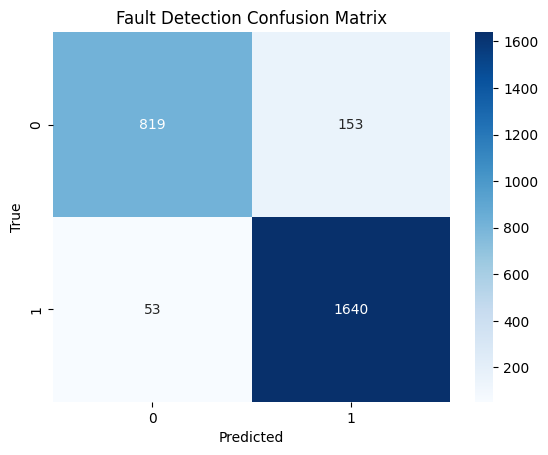

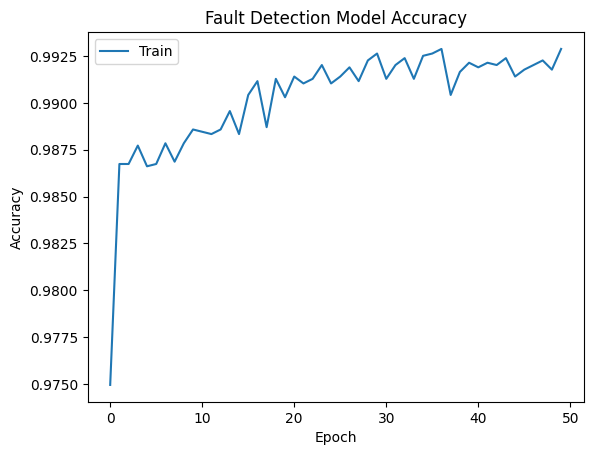

Epoch 1/50
255/255 [==============================] - 2s 3ms/step - loss: 0.1452 - accuracy: 0.9654
Epoch 2/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0522 - accuracy: 0.9870
Epoch 3/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0490 - accuracy: 0.9864
Epoch 4/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0449 - accuracy: 0.9865
Epoch 5/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0403 - accuracy: 0.9870
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0390 - accuracy: 0.9866
Epoch 7/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0385 - accuracy: 0.9862
Epoch 8/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0368 - accuracy: 0.9860
Epoch 9/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0342 - accuracy: 0.9871
Epoch 10/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0325 - accuracy: 0.9881

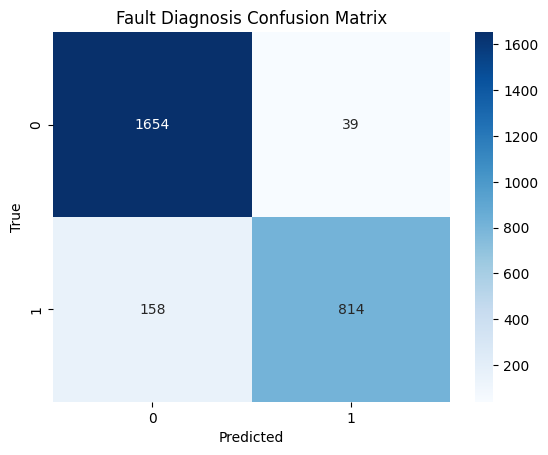

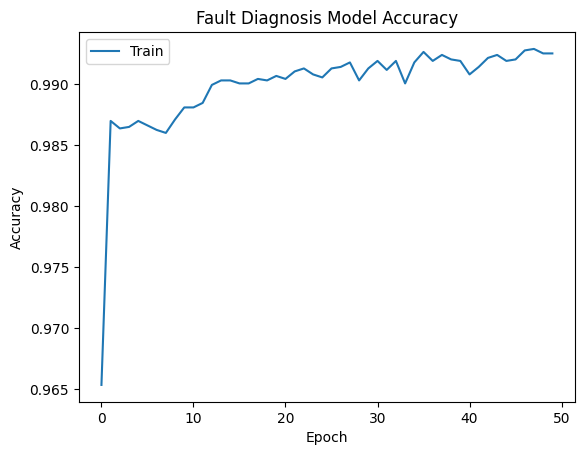

Hidden Markov Model Parameters for Fault Detection:
Number of states: 2
Starting probabilities: [1. 0.]
Transition probabilities: [[0.99550473 0.00449527]
 [0.00332422 0.99667578]]
Means of each state:
[[ 0.77115703  0.1188188   0.82589121  0.68144424  0.33962314]
 [-0.57042968 -0.08789101 -0.61091688 -0.50406856 -0.25122136]]
Covariance matrices of each state:
[[[3.62223124e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 7.85084597e-01 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.65403170e-04 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.51603264e-03
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   6.37480848e-01]]

 [[3.59846764e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 7.84456015e-01 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.11477639e-04 0.00000000e+

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
data_train = pd.read_csv("/content/datatraining.txt")
data_test = pd.read_csv("/content/datatest.txt")

# Drop unnecessary columns
data_train.drop(columns=["date"], inplace=True)
data_test.drop(columns=["date"], inplace=True)

# Define fault classes based on the "Occupancy" column for both fault detection and diagnosis
data_train["Fault_Detection"] = (data_train["Occupancy"] == 0).astype(int)
data_test["Fault_Detection"] = (data_test["Occupancy"] == 0).astype(int)

data_train["Fault_Diagnosis"] = data_train["Occupancy"]
data_test["Fault_Diagnosis"] = data_test["Occupancy"]

# Separate features and target variable for fault detection
X_train_detect = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_detect = data_train["Fault_Detection"]
X_test_detect = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_detect = data_test["Fault_Detection"]

# Separate features and target variable for fault diagnosis
X_train_diag = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_diag = data_train["Fault_Diagnosis"]
X_test_diag = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_diag = data_test["Fault_Diagnosis"]

# Normalize the features for fault detection
scaler_detect = StandardScaler()
X_train_scaled_detect = scaler_detect.fit_transform(X_train_detect)
X_test_scaled_detect = scaler_detect.transform(X_test_detect)

# Normalize the features for fault diagnosis
scaler_diag = StandardScaler()
X_train_scaled_diag = scaler_diag.fit_transform(X_train_diag)
X_test_scaled_diag = scaler_diag.transform(X_test_diag)

# Fit Hidden Markov Model for fault detection
hmm_model_detect = hmm.GaussianHMM(n_components=2)
hmm_model_detect.fit(X_train_scaled_detect)

# Generate hidden states for fault detection
hidden_states_train_detect = hmm_model_detect.predict(X_train_scaled_detect)
hidden_states_test_detect = hmm_model_detect.predict(X_test_scaled_detect)

# Fit Hidden Markov Model for fault diagnosis
hmm_model_diag = hmm.GaussianHMM(n_components=3)
hmm_model_diag.fit(X_train_scaled_diag)

# Generate hidden states for fault diagnosis
hidden_states_train_diag = hmm_model_diag.predict(X_train_scaled_diag)
hidden_states_test_diag = hmm_model_diag.predict(X_test_scaled_diag)

# Convert data for RNN input for fault detection
X_train_rnn_detect = X_train_scaled_detect.reshape((X_train_scaled_detect.shape[0], X_train_scaled_detect.shape[1], 1))
X_test_rnn_detect = X_test_scaled_detect.reshape((X_test_scaled_detect.shape[0], X_test_scaled_detect.shape[1], 1))

# Convert data for RNN input for fault diagnosis
X_train_rnn_diag = X_train_scaled_diag.reshape((X_train_scaled_diag.shape[0], X_train_scaled_diag.shape[1], 1))
X_test_rnn_diag = X_test_scaled_diag.reshape((X_test_scaled_diag.shape[0], X_test_scaled_diag.shape[1], 1))

# Build and train RNN model for fault detection
model_detect = Sequential([
    SimpleRNN(units=50, input_shape=(X_train_rnn_detect.shape[1], X_train_rnn_detect.shape[2])),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model_detect.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for fault detection
history_detect = model_detect.fit(X_train_rnn_detect, y_train_detect, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault detection
y_pred_proba_detect = model_detect.predict(X_test_rnn_detect)
y_pred_detect = (y_pred_proba_detect > 0.5).astype(int)  # Apply threshold for fault detection

# Calculate metrics for fault detection
accuracy_detect = accuracy_score(y_test_detect, y_pred_detect)
conf_matrix_detect = confusion_matrix(y_test_detect, y_pred_detect)
class_report_detect = classification_report(y_test_detect, y_pred_detect)

# Print metrics for fault detection
print("Fault Detection Metrics:")
print("Accuracy:", accuracy_detect)
print("Confusion Matrix:")
print(conf_matrix_detect)
print("Classification Report:")
print(class_report_detect)

# Plot confusion matrix for fault detection
sns.heatmap(conf_matrix_detect, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Detection Confusion Matrix")
plt.show()

# Plot training history for fault detection
plt.plot(history_detect.history['accuracy'])
plt.title('Fault Detection Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Build and train RNN model for fault diagnosis
model_diag = Sequential([
    SimpleRNN(units=50, input_shape=(X_train_rnn_diag.shape[1], X_train_rnn_diag.shape[2])),
    Dense(3, activation='softmax')  # Softmax activation for multi-class classification (3 fault classes)
])

model_diag.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for fault diagnosis
history_diag = model_diag.fit(X_train_rnn_diag, y_train_diag, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault diagnosis
y_pred_proba_diag = model_diag.predict(X_test_rnn_diag)
y_pred_diag = np.argmax(y_pred_proba_diag, axis=1)

# Calculate metrics for fault diagnosis
accuracy_diag = accuracy_score(y_test_diag, y_pred_diag)
conf_matrix_diag = confusion_matrix(y_test_diag, y_pred_diag)
class_report_diag = classification_report(y_test_diag, y_pred_diag)

# Print metrics for fault diagnosis
print("Fault Diagnosis Metrics:")
print("Accuracy:", accuracy_diag)
print("Confusion Matrix:")
print(conf_matrix_diag)
print("Classification Report:")
print(class_report_diag)

# Plot confusion matrix for fault diagnosis
sns.heatmap(conf_matrix_diag, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Diagnosis Confusion Matrix")
plt.show()

# Plot training history for fault diagnosis
plt.plot(history_diag.history['accuracy'])
plt.title('Fault Diagnosis Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Print HMM parameters for fault detection
print("Hidden Markov Model Parameters for Fault Detection:")
print("Number of states:", hmm_model_detect.n_components)
print("Starting probabilities:", hmm_model_detect.startprob_)
print("Transition probabilities:", hmm_model_detect.transmat_)
print("Means of each state:")
print(hmm_model_detect.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)

# Print HMM parameters for fault diagnosis
print("Hidden Markov Model Parameters for Fault Diagnosis:")
print("Number of states:", hmm_model_diag.n_components)
print("Starting probabilities:", hmm_model_diag.startprob_)
print("Transition probabilities:", hmm_model_diag.transmat_)
print("Means of each state:")
print(hmm_model_diag.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)


On datatest2

Epoch 1/50
255/255 [==============================] - 4s 5ms/step - loss: 0.0957 - accuracy: 0.9749
Epoch 2/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0503 - accuracy: 0.9866
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0447 - accuracy: 0.9869
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0427 - accuracy: 0.9865
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0405 - accuracy: 0.9870
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0393 - accuracy: 0.9881
Epoch 7/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0375 - accuracy: 0.9870
Epoch 8/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0346 - accuracy: 0.9872
Epoch 9/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0338 - accuracy: 0.9870
Epoch 10/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0325 - accuracy: 0.9880

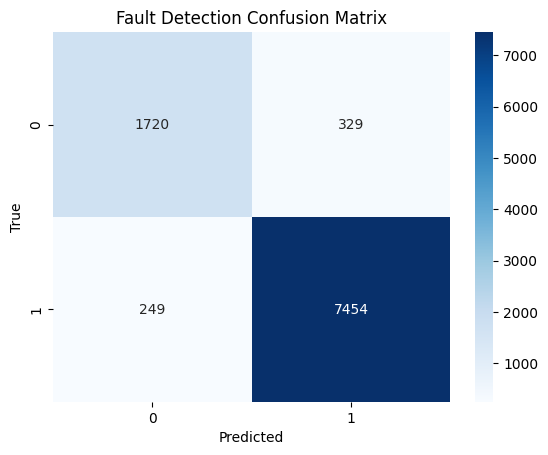

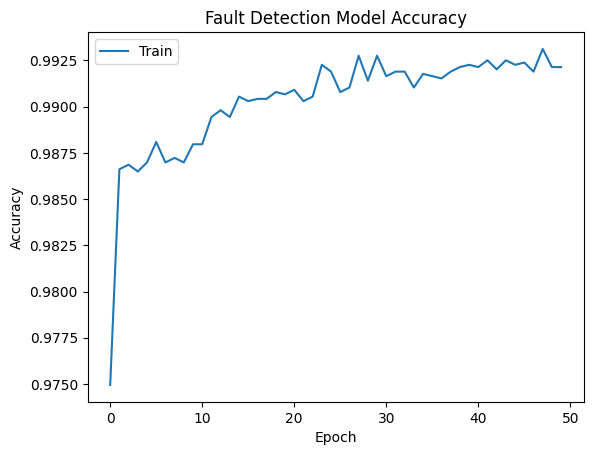

Epoch 1/50
255/255 [==============================] - 2s 3ms/step - loss: 0.1287 - accuracy: 0.9706
Epoch 2/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0503 - accuracy: 0.9870
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0452 - accuracy: 0.9871
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0423 - accuracy: 0.9869
Epoch 5/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0404 - accuracy: 0.9867
Epoch 6/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0394 - accuracy: 0.9877
Epoch 7/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0373 - accuracy: 0.9867
Epoch 8/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0363 - accuracy: 0.9876
Epoch 9/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0344 - accuracy: 0.9877
Epoch 10/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0325 - accuracy: 0.9874

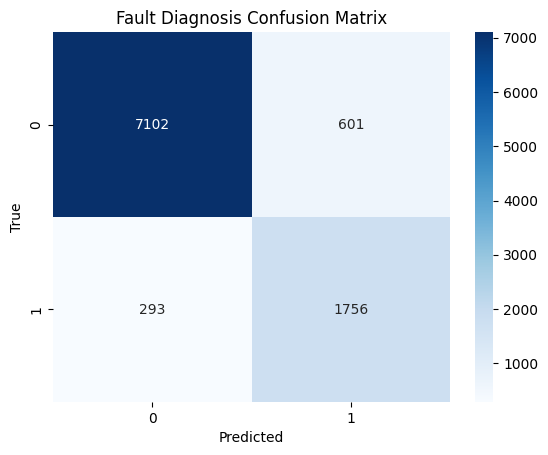

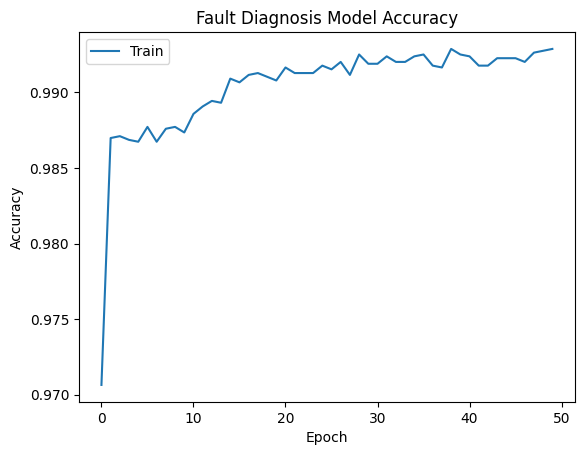

Hidden Markov Model Parameters for Fault Detection:
Number of states: 2
Starting probabilities: [0. 1.]
Transition probabilities: [[0.99737866 0.00262134]
 [0.00348031 0.99651969]]
Means of each state:
[[-0.56355783 -0.09289388 -0.61164656 -0.50353085 -0.2539057 ]
 [ 0.74801226  0.12329838  0.8118406   0.66833824  0.33700991]]
Covariance matrices of each state:
[[[3.61347060e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 7.84913482e-01 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 2.01067171e-04 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.48049305e-03
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   6.36492522e-01]]

 [[8.26966463e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 1.26667648e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.16502991e+00 0.00000000e+

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
data_train = pd.read_csv("/content/datatraining.txt")
data_test = pd.read_csv("/content/datatest2.txt")

# Drop unnecessary columns
data_train.drop(columns=["date"], inplace=True)
data_test.drop(columns=["date"], inplace=True)

# Define fault classes based on the "Occupancy" column for both fault detection and diagnosis
data_train["Fault_Detection"] = (data_train["Occupancy"] == 0).astype(int)
data_test["Fault_Detection"] = (data_test["Occupancy"] == 0).astype(int)

data_train["Fault_Diagnosis"] = data_train["Occupancy"]
data_test["Fault_Diagnosis"] = data_test["Occupancy"]

# Separate features and target variable for fault detection
X_train_detect = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_detect = data_train["Fault_Detection"]
X_test_detect = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_detect = data_test["Fault_Detection"]

# Separate features and target variable for fault diagnosis
X_train_diag = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_diag = data_train["Fault_Diagnosis"]
X_test_diag = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_diag = data_test["Fault_Diagnosis"]

# Normalize the features for fault detection
scaler_detect = StandardScaler()
X_train_scaled_detect = scaler_detect.fit_transform(X_train_detect)
X_test_scaled_detect = scaler_detect.transform(X_test_detect)

# Normalize the features for fault diagnosis
scaler_diag = StandardScaler()
X_train_scaled_diag = scaler_diag.fit_transform(X_train_diag)
X_test_scaled_diag = scaler_diag.transform(X_test_diag)

# Fit Hidden Markov Model for fault detection
hmm_model_detect = hmm.GaussianHMM(n_components=2)
hmm_model_detect.fit(X_train_scaled_detect)

# Generate hidden states for fault detection
hidden_states_train_detect = hmm_model_detect.predict(X_train_scaled_detect)
hidden_states_test_detect = hmm_model_detect.predict(X_test_scaled_detect)

# Fit Hidden Markov Model for fault diagnosis
hmm_model_diag = hmm.GaussianHMM(n_components=3)
hmm_model_diag.fit(X_train_scaled_diag)

# Generate hidden states for fault diagnosis
hidden_states_train_diag = hmm_model_diag.predict(X_train_scaled_diag)
hidden_states_test_diag = hmm_model_diag.predict(X_test_scaled_diag)

# Convert data for RNN input for fault detection
X_train_rnn_detect = X_train_scaled_detect.reshape((X_train_scaled_detect.shape[0], X_train_scaled_detect.shape[1], 1))
X_test_rnn_detect = X_test_scaled_detect.reshape((X_test_scaled_detect.shape[0], X_test_scaled_detect.shape[1], 1))

# Convert data for RNN input for fault diagnosis
X_train_rnn_diag = X_train_scaled_diag.reshape((X_train_scaled_diag.shape[0], X_train_scaled_diag.shape[1], 1))
X_test_rnn_diag = X_test_scaled_diag.reshape((X_test_scaled_diag.shape[0], X_test_scaled_diag.shape[1], 1))

# Build and train RNN model for fault detection
model_detect = Sequential([
    SimpleRNN(units=50, input_shape=(X_train_rnn_detect.shape[1], X_train_rnn_detect.shape[2])),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model_detect.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for fault detection
history_detect = model_detect.fit(X_train_rnn_detect, y_train_detect, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault detection
y_pred_proba_detect = model_detect.predict(X_test_rnn_detect)
y_pred_detect = (y_pred_proba_detect > 0.5).astype(int)  # Apply threshold for fault detection

# Calculate metrics for fault detection
accuracy_detect = accuracy_score(y_test_detect, y_pred_detect)
conf_matrix_detect = confusion_matrix(y_test_detect, y_pred_detect)
class_report_detect = classification_report(y_test_detect, y_pred_detect)

# Print metrics for fault detection
print("Fault Detection Metrics:")
print("Accuracy:", accuracy_detect)
print("Confusion Matrix:")
print(conf_matrix_detect)
print("Classification Report:")
print(class_report_detect)

# Plot confusion matrix for fault detection
sns.heatmap(conf_matrix_detect, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Detection Confusion Matrix")
plt.show()

# Plot training history for fault detection
plt.plot(history_detect.history['accuracy'])
plt.title('Fault Detection Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Build and train RNN model for fault diagnosis
model_diag = Sequential([
    SimpleRNN(units=50, input_shape=(X_train_rnn_diag.shape[1], X_train_rnn_diag.shape[2])),
    Dense(3, activation='softmax')  # Softmax activation for multi-class classification (3 fault classes)
])

model_diag.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for fault diagnosis
history_diag = model_diag.fit(X_train_rnn_diag, y_train_diag, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault diagnosis
y_pred_proba_diag = model_diag.predict(X_test_rnn_diag)
y_pred_diag = np.argmax(y_pred_proba_diag, axis=1)

# Calculate metrics for fault diagnosis
accuracy_diag = accuracy_score(y_test_diag, y_pred_diag)
conf_matrix_diag = confusion_matrix(y_test_diag, y_pred_diag)
class_report_diag = classification_report(y_test_diag, y_pred_diag)

# Print metrics for fault diagnosis
print("Fault Diagnosis Metrics:")
print("Accuracy:", accuracy_diag)
print("Confusion Matrix:")
print(conf_matrix_diag)
print("Classification Report:")
print(class_report_diag)

# Plot confusion matrix for fault diagnosis
sns.heatmap(conf_matrix_diag, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Diagnosis Confusion Matrix")
plt.show()

# Plot training history for fault diagnosis
plt.plot(history_diag.history['accuracy'])
plt.title('Fault Diagnosis Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Print HMM parameters for fault detection
print("Hidden Markov Model Parameters for Fault Detection:")
print("Number of states:", hmm_model_detect.n_components)
print("Starting probabilities:", hmm_model_detect.startprob_)
print("Transition probabilities:", hmm_model_detect.transmat_)
print("Means of each state:")
print(hmm_model_detect.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)

# Print HMM parameters for fault diagnosis
print("Hidden Markov Model Parameters for Fault Diagnosis:")
print("Number of states:", hmm_model_diag.n_components)
print("Starting probabilities:", hmm_model_diag.startprob_)
print("Transition probabilities:", hmm_model_diag.transmat_)
print("Means of each state:")
print(hmm_model_diag.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)


HMM AND CNN
On datatest1

Epoch 1/50
255/255 [==============================] - 2s 4ms/step - loss: 0.1124 - accuracy: 0.9677
Epoch 2/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0510 - accuracy: 0.9870
Epoch 3/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0478 - accuracy: 0.9865
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0434 - accuracy: 0.9872
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0405 - accuracy: 0.9875
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0395 - accuracy: 0.9867
Epoch 7/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0375 - accuracy: 0.9864
Epoch 8/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0356 - accuracy: 0.9867
Epoch 9/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0339 - accuracy: 0.9874
Epoch 10/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0321 - accuracy: 0.9888

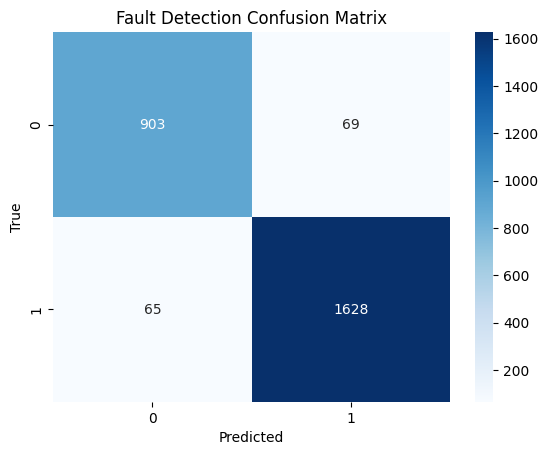

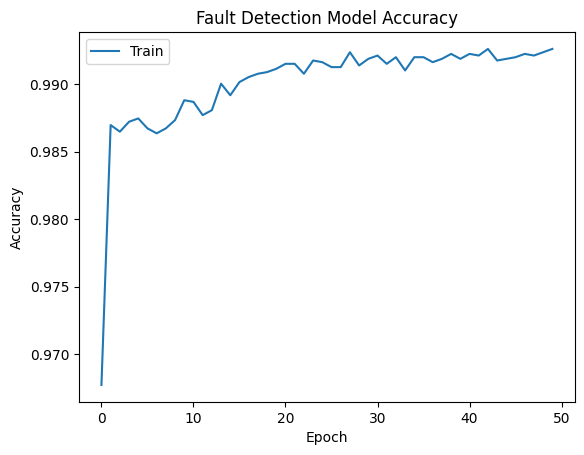

Epoch 1/50
255/255 [==============================] - 2s 3ms/step - loss: 0.1398 - accuracy: 0.9667
Epoch 2/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0513 - accuracy: 0.9875
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0479 - accuracy: 0.9871
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0430 - accuracy: 0.9862
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0426 - accuracy: 0.9861
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0397 - accuracy: 0.9870
Epoch 7/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0391 - accuracy: 0.9869
Epoch 8/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0367 - accuracy: 0.9867
Epoch 9/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0357 - accuracy: 0.9864
Epoch 10/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0337 - accuracy: 0.9867

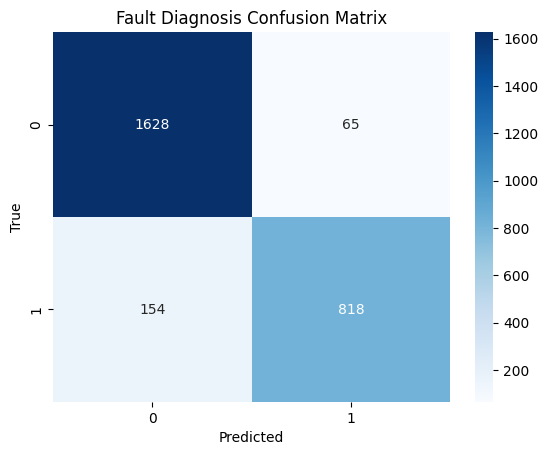

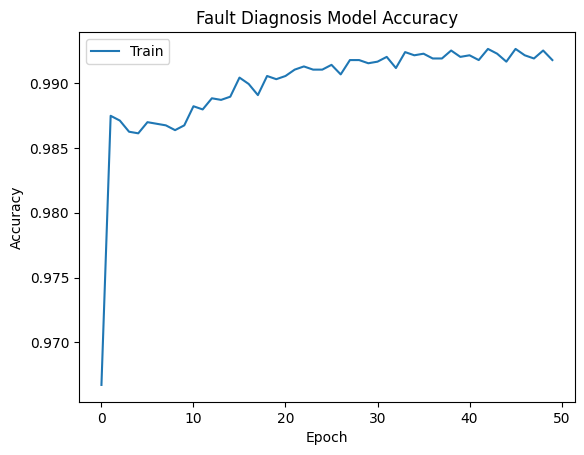

Hidden Markov Model Parameters for Fault Detection:
Number of states: 2
Starting probabilities: [1. 0.]
Transition probabilities: [[0.99511339 0.00488661]
 [0.00384083 0.99615917]]
Means of each state:
[[ 0.70432898  0.12556284  0.77974396  0.63886442  0.32593293]
 [-0.55375034 -0.09871874 -0.61304234 -0.50228146 -0.25625166]]
Covariance matrices of each state:
[[[6.07762573e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 1.31412619e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.08456255e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.53537923e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   1.35516614e+00]]

 [[3.81379063e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 4.02773104e-01 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 2.17122176e-03 0.00000000e+

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
data_train = pd.read_csv("/content/datatraining.txt")
data_test = pd.read_csv("/content/datatest.txt")

# Drop unnecessary columns
data_train.drop(columns=["date"], inplace=True)
data_test.drop(columns=["date"], inplace=True)

# Define fault classes based on the "Occupancy" column for both fault detection and diagnosis
data_train["Fault_Detection"] = (data_train["Occupancy"] == 0).astype(int)
data_test["Fault_Detection"] = (data_test["Occupancy"] == 0).astype(int)

data_train["Fault_Diagnosis"] = data_train["Occupancy"]
data_test["Fault_Diagnosis"] = data_test["Occupancy"]

# Separate features and target variable for fault detection
X_train_detect = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_detect = data_train["Fault_Detection"]
X_test_detect = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_detect = data_test["Fault_Detection"]

# Separate features and target variable for fault diagnosis
X_train_diag = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_diag = data_train["Fault_Diagnosis"]
X_test_diag = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_diag = data_test["Fault_Diagnosis"]

# Normalize the features for fault detection
scaler_detect = StandardScaler()
X_train_scaled_detect = scaler_detect.fit_transform(X_train_detect)
X_test_scaled_detect = scaler_detect.transform(X_test_detect)

# Normalize the features for fault diagnosis
scaler_diag = StandardScaler()
X_train_scaled_diag = scaler_diag.fit_transform(X_train_diag)
X_test_scaled_diag = scaler_diag.transform(X_test_diag)

# Fit Hidden Markov Model for fault detection
hmm_model_detect = hmm.GaussianHMM(n_components=2)
hmm_model_detect.fit(X_train_scaled_detect)

# Generate hidden states for fault detection
hidden_states_train_detect = hmm_model_detect.predict(X_train_scaled_detect)
hidden_states_test_detect = hmm_model_detect.predict(X_test_scaled_detect)

# Fit Hidden Markov Model for fault diagnosis
hmm_model_diag = hmm.GaussianHMM(n_components=3)
hmm_model_diag.fit(X_train_scaled_diag)

# Generate hidden states for fault diagnosis
hidden_states_train_diag = hmm_model_diag.predict(X_train_scaled_diag)
hidden_states_test_diag = hmm_model_diag.predict(X_test_scaled_diag)

# Convert data for RNN input for fault detection
X_train_rnn_detect = X_train_scaled_detect.reshape((X_train_scaled_detect.shape[0], X_train_scaled_detect.shape[1], 1))
X_test_rnn_detect = X_test_scaled_detect.reshape((X_test_scaled_detect.shape[0], X_test_scaled_detect.shape[1], 1))

# Convert data for RNN input for fault diagnosis
X_train_rnn_diag = X_train_scaled_diag.reshape((X_train_scaled_diag.shape[0], X_train_scaled_diag.shape[1], 1))
X_test_rnn_diag = X_test_scaled_diag.reshape((X_test_scaled_diag.shape[0], X_test_scaled_diag.shape[1], 1))

# Build and train RNN model for fault detection
model_detect = Sequential([
    SimpleRNN(units=50, input_shape=(X_train_rnn_detect.shape[1], X_train_rnn_detect.shape[2])),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model_detect.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for fault detection
history_detect = model_detect.fit(X_train_rnn_detect, y_train_detect, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault detection
y_pred_proba_detect = model_detect.predict(X_test_rnn_detect)
y_pred_detect = (y_pred_proba_detect > 0.5).astype(int)  # Apply threshold for fault detection

# Calculate metrics for fault detection
accuracy_detect = accuracy_score(y_test_detect, y_pred_detect)
conf_matrix_detect = confusion_matrix(y_test_detect, y_pred_detect)
class_report_detect = classification_report(y_test_detect, y_pred_detect)

# Print metrics for fault detection
print("Fault Detection Metrics:")
print("Accuracy:", accuracy_detect)
print("Confusion Matrix:")
print(conf_matrix_detect)
print("Classification Report:")
print(class_report_detect)

# Plot confusion matrix for fault detection
sns.heatmap(conf_matrix_detect, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Detection Confusion Matrix")
plt.show()

# Plot training history for fault detection
plt.plot(history_detect.history['accuracy'])
plt.title('Fault Detection Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Build and train RNN model for fault diagnosis
model_diag = Sequential([
    SimpleRNN(units=50, input_shape=(X_train_rnn_diag.shape[1], X_train_rnn_diag.shape[2])),
    Dense(3, activation='softmax')  # Softmax activation for multi-class classification (3 fault classes)
])

model_diag.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for fault diagnosis
history_diag = model_diag.fit(X_train_rnn_diag, y_train_diag, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault diagnosis
y_pred_proba_diag = model_diag.predict(X_test_rnn_diag)
y_pred_diag = np.argmax(y_pred_proba_diag, axis=1)

# Calculate metrics for fault diagnosis
accuracy_diag = accuracy_score(y_test_diag, y_pred_diag)
conf_matrix_diag = confusion_matrix(y_test_diag, y_pred_diag)
class_report_diag = classification_report(y_test_diag, y_pred_diag)

# Print metrics for fault diagnosis
print("Fault Diagnosis Metrics:")
print("Accuracy:", accuracy_diag)
print("Confusion Matrix:")
print(conf_matrix_diag)
print("Classification Report:")
print(class_report_diag)

# Plot confusion matrix for fault diagnosis
sns.heatmap(conf_matrix_diag, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Diagnosis Confusion Matrix")
plt.show()

# Plot training history for fault diagnosis
plt.plot(history_diag.history['accuracy'])
plt.title('Fault Diagnosis Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Print HMM parameters for fault detection
print("Hidden Markov Model Parameters for Fault Detection:")
print("Number of states:", hmm_model_detect.n_components)
print("Starting probabilities:", hmm_model_detect.startprob_)
print("Transition probabilities:", hmm_model_detect.transmat_)
print("Means of each state:")
print(hmm_model_detect.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)

# Print HMM parameters for fault diagnosis
print("Hidden Markov Model Parameters for Fault Diagnosis:")
print("Number of states:", hmm_model_diag.n_components)
print("Starting probabilities:", hmm_model_diag.startprob_)
print("Transition probabilities:", hmm_model_diag.transmat_)
print("Means of each state:")
print(hmm_model_diag.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)

# Print HMM parameters for fault diagnosis
print("Hidden Markov Model Parameters for Fault Diagnosis:")
print("Number of states:", hmm_model_diag.n_components)
print("Starting probabilities:", hmm_model_diag.startprob_)
print("Transition probabilities:", hmm_model_diag.transmat_)
print("Means of each state:")
print(hmm_model_diag.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)




On datatest2

Epoch 1/50
255/255 [==============================] - 4s 6ms/step - loss: 0.1028 - accuracy: 0.9751
Epoch 2/50
255/255 [==============================] - 1s 6ms/step - loss: 0.0506 - accuracy: 0.9872
Epoch 3/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0452 - accuracy: 0.9874
Epoch 4/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0428 - accuracy: 0.9867
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0413 - accuracy: 0.9866
Epoch 6/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0405 - accuracy: 0.9864
Epoch 7/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0364 - accuracy: 0.9871
Epoch 8/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0364 - accuracy: 0.9871
Epoch 9/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0335 - accuracy: 0.9874
Epoch 10/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0331 - accuracy: 0.9881

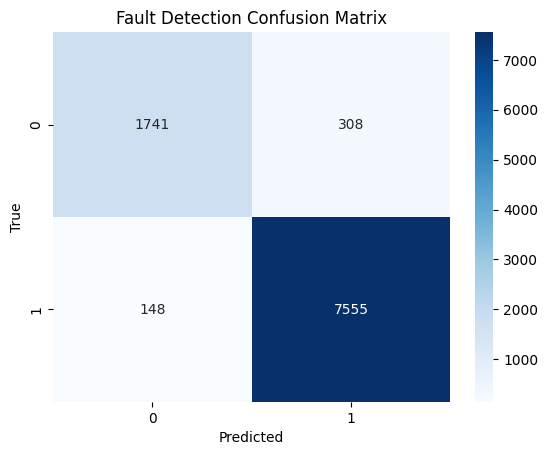

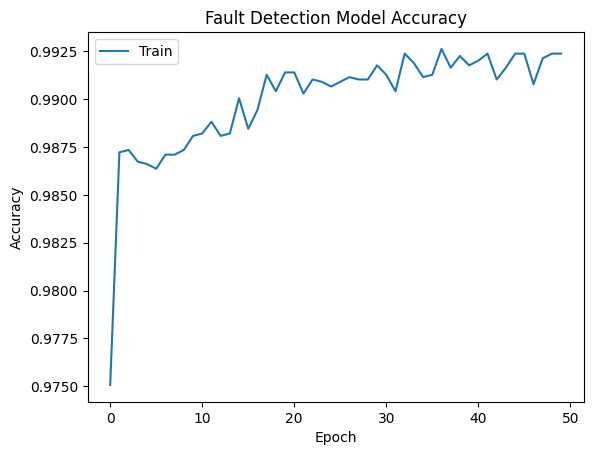

Epoch 1/50
255/255 [==============================] - 3s 5ms/step - loss: 0.1543 - accuracy: 0.9559
Epoch 2/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0507 - accuracy: 0.9872
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0459 - accuracy: 0.9866
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0450 - accuracy: 0.9867
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0416 - accuracy: 0.9870
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0394 - accuracy: 0.9864
Epoch 7/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0391 - accuracy: 0.9862
Epoch 8/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0358 - accuracy: 0.9869
Epoch 9/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9867
Epoch 10/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0332 - accuracy: 0.9870

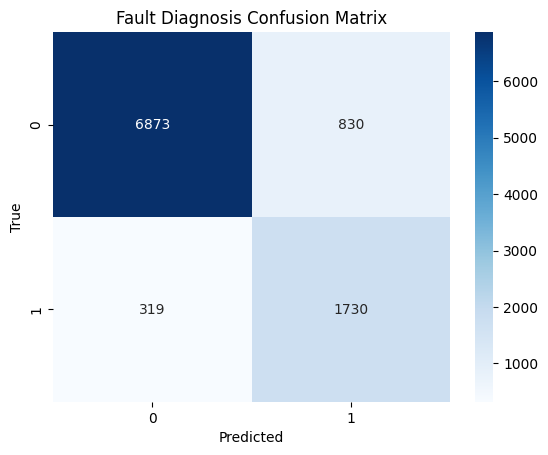

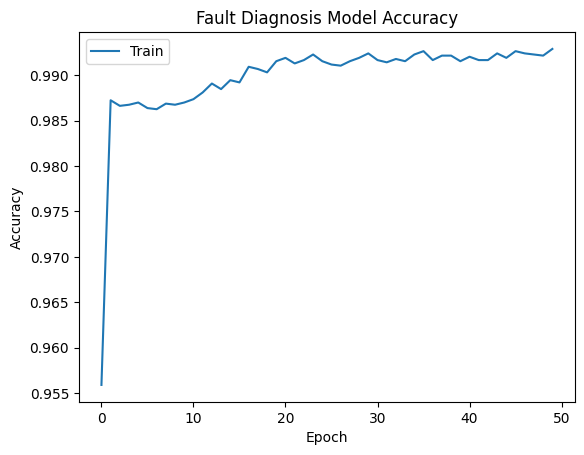

Hidden Markov Model Parameters for Fault Detection:
Number of states: 2
Starting probabilities: [1. 0.]
Transition probabilities: [[0.99544037 0.00455963]
 [0.00355009 0.99644991]]
Means of each state:
[[ 0.71460404  0.12719721  0.78675684  0.64535971  0.33049855]
 [-0.55654121 -0.09906254 -0.61273458 -0.50261299 -0.25739578]]
Covariance matrices of each state:
[[[4.36229642e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 4.21407457e-01 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 5.80625986e-04 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.62005357e-03
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   3.25079378e-01]]

 [[9.24582088e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 1.71676311e-02 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 3.26893581e-01 0.00000000e+

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
data_train = pd.read_csv("/content/datatraining.txt")
data_test = pd.read_csv("/content/datatest2.txt")

# Drop unnecessary columns
data_train.drop(columns=["date"], inplace=True)
data_test.drop(columns=["date"], inplace=True)

# Define fault classes based on the "Occupancy" column for both fault detection and diagnosis
data_train["Fault_Detection"] = (data_train["Occupancy"] == 0).astype(int)
data_test["Fault_Detection"] = (data_test["Occupancy"] == 0).astype(int)

data_train["Fault_Diagnosis"] = data_train["Occupancy"]
data_test["Fault_Diagnosis"] = data_test["Occupancy"]

# Separate features and target variable for fault detection
X_train_detect = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_detect = data_train["Fault_Detection"]
X_test_detect = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_detect = data_test["Fault_Detection"]

# Separate features and target variable for fault diagnosis
X_train_diag = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_diag = data_train["Fault_Diagnosis"]
X_test_diag = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_diag = data_test["Fault_Diagnosis"]

# Normalize the features for fault detection
scaler_detect = StandardScaler()
X_train_scaled_detect = scaler_detect.fit_transform(X_train_detect)
X_test_scaled_detect = scaler_detect.transform(X_test_detect)

# Normalize the features for fault diagnosis
scaler_diag = StandardScaler()
X_train_scaled_diag = scaler_diag.fit_transform(X_train_diag)
X_test_scaled_diag = scaler_diag.transform(X_test_diag)

# Fit Hidden Markov Model for fault detection
hmm_model_detect = hmm.GaussianHMM(n_components=2)
hmm_model_detect.fit(X_train_scaled_detect)

# Generate hidden states for fault detection
hidden_states_train_detect = hmm_model_detect.predict(X_train_scaled_detect)
hidden_states_test_detect = hmm_model_detect.predict(X_test_scaled_detect)

# Fit Hidden Markov Model for fault diagnosis
hmm_model_diag = hmm.GaussianHMM(n_components=3)
hmm_model_diag.fit(X_train_scaled_diag)

# Generate hidden states for fault diagnosis
hidden_states_train_diag = hmm_model_diag.predict(X_train_scaled_diag)
hidden_states_test_diag = hmm_model_diag.predict(X_test_scaled_diag)

# Convert data for RNN input for fault detection
X_train_rnn_detect = X_train_scaled_detect.reshape((X_train_scaled_detect.shape[0], X_train_scaled_detect.shape[1], 1))
X_test_rnn_detect = X_test_scaled_detect.reshape((X_test_scaled_detect.shape[0], X_test_scaled_detect.shape[1], 1))

# Convert data for RNN input for fault diagnosis
X_train_rnn_diag = X_train_scaled_diag.reshape((X_train_scaled_diag.shape[0], X_train_scaled_diag.shape[1], 1))
X_test_rnn_diag = X_test_scaled_diag.reshape((X_test_scaled_diag.shape[0], X_test_scaled_diag.shape[1], 1))

# Build and train RNN model for fault detection
model_detect = Sequential([
    SimpleRNN(units=50, input_shape=(X_train_rnn_detect.shape[1], X_train_rnn_detect.shape[2])),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model_detect.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for fault detection
history_detect = model_detect.fit(X_train_rnn_detect, y_train_detect, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault detection
y_pred_proba_detect = model_detect.predict(X_test_rnn_detect)
y_pred_detect = (y_pred_proba_detect > 0.5).astype(int)  # Apply threshold for fault detection

# Calculate metrics for fault detection
accuracy_detect = accuracy_score(y_test_detect, y_pred_detect)
conf_matrix_detect = confusion_matrix(y_test_detect, y_pred_detect)
class_report_detect = classification_report(y_test_detect, y_pred_detect)

# Print metrics for fault detection
print("Fault Detection Metrics:")
print("Accuracy:", accuracy_detect)
print("Confusion Matrix:")
print(conf_matrix_detect)
print("Classification Report:")
print(class_report_detect)

# Plot confusion matrix for fault detection
sns.heatmap(conf_matrix_detect, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Detection Confusion Matrix")
plt.show()

# Plot training history for fault detection
plt.plot(history_detect.history['accuracy'])
plt.title('Fault Detection Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Build and train RNN model for fault diagnosis
model_diag = Sequential([
    SimpleRNN(units=50, input_shape=(X_train_rnn_diag.shape[1], X_train_rnn_diag.shape[2])),
    Dense(3, activation='softmax')  # Softmax activation for multi-class classification (3 fault classes)
])

model_diag.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for fault diagnosis
history_diag = model_diag.fit(X_train_rnn_diag, y_train_diag, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault diagnosis
y_pred_proba_diag = model_diag.predict(X_test_rnn_diag)
y_pred_diag = np.argmax(y_pred_proba_diag, axis=1)

# Calculate metrics for fault diagnosis
accuracy_diag = accuracy_score(y_test_diag, y_pred_diag)
conf_matrix_diag = confusion_matrix(y_test_diag, y_pred_diag)
class_report_diag = classification_report(y_test_diag, y_pred_diag)

# Print metrics for fault diagnosis
print("Fault Diagnosis Metrics:")
print("Accuracy:", accuracy_diag)
print("Confusion Matrix:")
print(conf_matrix_diag)
print("Classification Report:")
print(class_report_diag)

# Plot confusion matrix for fault diagnosis
sns.heatmap(conf_matrix_diag, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Diagnosis Confusion Matrix")
plt.show()

# Plot training history for fault diagnosis
plt.plot(history_diag.history['accuracy'])
plt.title('Fault Diagnosis Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Print HMM parameters for fault detection
print("Hidden Markov Model Parameters for Fault Detection:")
print("Number of states:", hmm_model_detect.n_components)
print("Starting probabilities:", hmm_model_detect.startprob_)
print("Transition probabilities:", hmm_model_detect.transmat_)
print("Means of each state:")
print(hmm_model_detect.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)

# Print HMM parameters for fault diagnosis
print("Hidden Markov Model Parameters for Fault Diagnosis:")
print("Number of states:", hmm_model_diag.n_components)
print("Starting probabilities:", hmm_model_diag.startprob_)
print("Transition probabilities:", hmm_model_diag.transmat_)
print("Means of each state:")
print(hmm_model_diag.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)

# Print HMM parameters for fault diagnosis
print("Hidden Markov Model Parameters for Fault Diagnosis:")
print("Number of states:", hmm_model_diag.n_components)
print("Starting probabilities:", hmm_model_diag.startprob_)
print("Transition probabilities:", hmm_model_diag.transmat_)
print("Means of each state:")
print(hmm_model_diag.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)




HMM AND R-CNN
On datatest1

Epoch 1/50
255/255 [==============================] - 3s 3ms/step - loss: 0.1232 - accuracy: 0.9645
Epoch 2/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0504 - accuracy: 0.9853
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0462 - accuracy: 0.9861
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0443 - accuracy: 0.9862
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0417 - accuracy: 0.9865
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0393 - accuracy: 0.9866
Epoch 7/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0378 - accuracy: 0.9866
Epoch 8/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0370 - accuracy: 0.9871
Epoch 9/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0365 - accuracy: 0.9871
Epoch 10/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0344 - accuracy: 0.9869

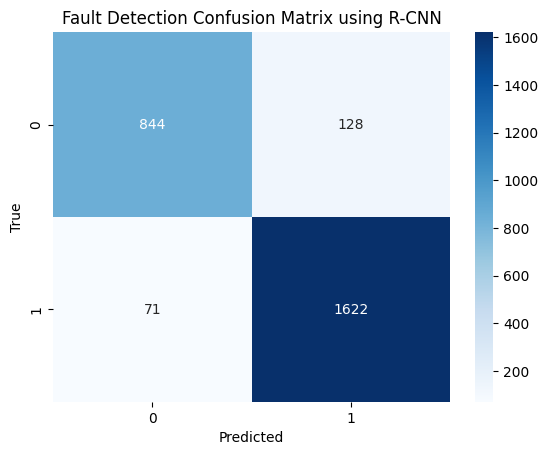

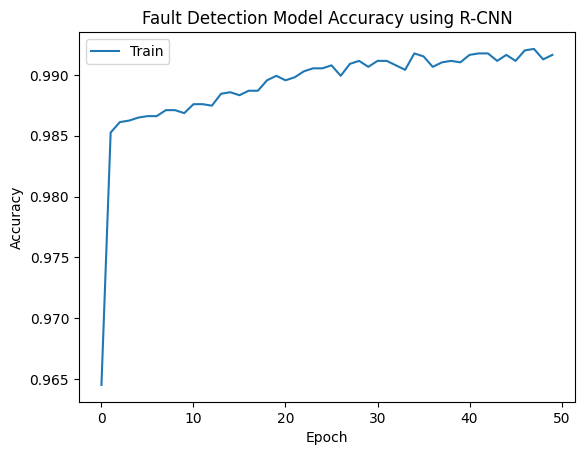

Epoch 1/50
255/255 [==============================] - 2s 3ms/step - loss: 0.1427 - accuracy: 0.9699
Epoch 2/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0482 - accuracy: 0.9862
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0435 - accuracy: 0.9861
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0413 - accuracy: 0.9870
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0394 - accuracy: 0.9861
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0387 - accuracy: 0.9866
Epoch 7/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 0.9859
Epoch 8/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0362 - accuracy: 0.9870
Epoch 9/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0357 - accuracy: 0.9871
Epoch 10/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0338 - accuracy: 0.9872

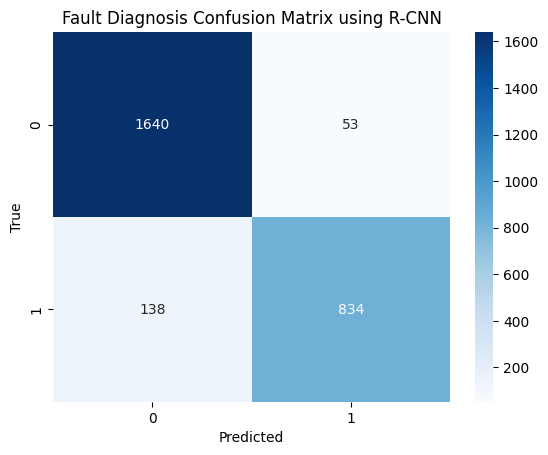

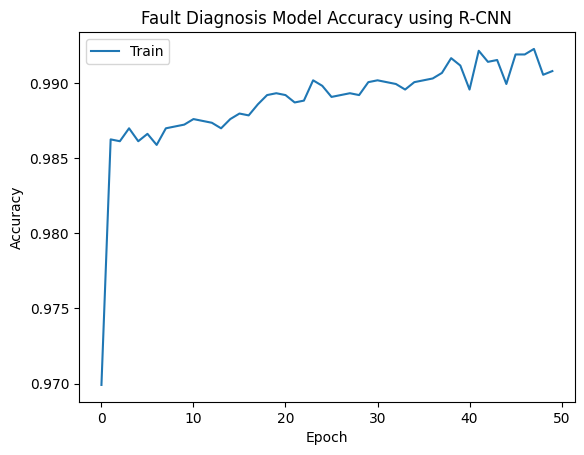

Hidden Markov Model Parameters for Fault Detection:
Number of states: 2
Starting probabilities: [1. 0.]
Transition probabilities: [[0.99554591 0.00445409]
 [0.00328642 0.99671358]]
Means of each state:
[[ 0.77394656  0.11795967  0.82760549  0.68303328  0.33964907]
 [-0.57121541 -0.08706077 -0.61081867 -0.50411638 -0.25067982]]
Covariance matrices of each state:
[[[8.23930092e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 1.26742105e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.16420196e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.54069088e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   1.29212388e+00]]

 [[3.61576360e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 7.84783493e-01 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.97792502e-04 0.00000000e+

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, SimpleRNN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
data_train = pd.read_csv("/content/datatraining.txt")
data_test = pd.read_csv("/content/datatest.txt")

# Drop unnecessary columns
data_train.drop(columns=["date"], inplace=True)
data_test.drop(columns=["date"], inplace=True)

# Define fault classes based on the "Occupancy" column for both fault detection and diagnosis
data_train["Fault_Detection"] = (data_train["Occupancy"] == 0).astype(int)
data_test["Fault_Detection"] = (data_test["Occupancy"] == 0).astype(int)

data_train["Fault_Diagnosis"] = data_train["Occupancy"]
data_test["Fault_Diagnosis"] = data_test["Occupancy"]

# Separate features and target variable for fault detection
X_train_detect = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_detect = data_train["Fault_Detection"]
X_test_detect = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_detect = data_test["Fault_Detection"]

# Separate features and target variable for fault diagnosis
X_train_diag = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_diag = data_train["Fault_Diagnosis"]
X_test_diag = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_diag = data_test["Fault_Diagnosis"]

# Normalize the features for fault detection
scaler_detect = StandardScaler()
X_train_scaled_detect = scaler_detect.fit_transform(X_train_detect)
X_test_scaled_detect = scaler_detect.transform(X_test_detect)

# Normalize the features for fault diagnosis
scaler_diag = StandardScaler()
X_train_scaled_diag = scaler_diag.fit_transform(X_train_diag)
X_test_scaled_diag = scaler_diag.transform(X_test_diag)

# Fit Hidden Markov Model for fault detection
hmm_model_detect = hmm.GaussianHMM(n_components=2)
hmm_model_detect.fit(X_train_scaled_detect)

# Generate hidden states for fault detection
hidden_states_train_detect = hmm_model_detect.predict(X_train_scaled_detect)
hidden_states_test_detect = hmm_model_detect.predict(X_test_scaled_detect)

# Fit Hidden Markov Model for fault diagnosis
hmm_model_diag = hmm.GaussianHMM(n_components=3)
hmm_model_diag.fit(X_train_scaled_diag)

# Generate hidden states for fault diagnosis
hidden_states_train_diag = hmm_model_diag.predict(X_train_scaled_diag)
hidden_states_test_diag = hmm_model_diag.predict(X_test_scaled_diag)

# Convert data for R-CNN input for fault detection
X_train_rcnn_detect = X_train_scaled_detect.reshape((X_train_scaled_detect.shape[0], X_train_scaled_detect.shape[1], 1))
X_test_rcnn_detect = X_test_scaled_detect.reshape((X_test_scaled_detect.shape[0], X_test_scaled_detect.shape[1], 1))

# Convert data for R-CNN input for fault diagnosis
X_train_rcnn_diag = X_train_scaled_diag.reshape((X_train_scaled_diag.shape[0], X_train_scaled_diag.shape[1], 1))
X_test_rcnn_diag = X_test_scaled_diag.reshape((X_test_scaled_diag.shape[0], X_test_scaled_diag.shape[1], 1))

# Build and train R-CNN model for fault detection
model_rcnn_detect = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_rcnn_detect.shape[1], X_train_rcnn_detect.shape[2])),
    MaxPooling1D(pool_size=2),
    SimpleRNN(units=50),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model_rcnn_detect.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for fault detection
history_rcnn_detect = model_rcnn_detect.fit(X_train_rcnn_detect, y_train_detect, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault detection
y_pred_proba_rcnn_detect = model_rcnn_detect.predict(X_test_rcnn_detect)
y_pred_rcnn_detect = (y_pred_proba_rcnn_detect > 0.5).astype(int)  # Apply threshold for fault detection

# Calculate metrics for fault detection
accuracy_rcnn_detect = accuracy_score(y_test_detect, y_pred_rcnn_detect)
conf_matrix_rcnn_detect = confusion_matrix(y_test_detect, y_pred_rcnn_detect)
class_report_rcnn_detect = classification_report(y_test_detect, y_pred_rcnn_detect)

# Print metrics for fault detection using R-CNN
print("Fault Detection Metrics using R-CNN:")
print("Accuracy:", accuracy_rcnn_detect)
print("Confusion Matrix:")
print(conf_matrix_rcnn_detect)
print("Classification Report:")
print(class_report_rcnn_detect)

# Plot confusion matrix for fault detection using R-CNN
sns.heatmap(conf_matrix_rcnn_detect, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Detection Confusion Matrix using R-CNN")
plt.show()

# Plot training history for fault detection using R-CNN
plt.plot(history_rcnn_detect.history['accuracy'])
plt.title('Fault Detection Model Accuracy using R-CNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Build and train R-CNN model for fault diagnosis
model_rcnn_diag = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_rcnn_diag.shape[1], X_train_rcnn_diag.shape[2])),
    MaxPooling1D(pool_size=2),
    SimpleRNN(units=50),
    Dense(3, activation='softmax')  # Softmax activation for multi-class classification (3 fault classes)
])

model_rcnn_diag.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for fault diagnosis
history_rcnn_diag = model_rcnn_diag.fit(X_train_rcnn_diag, y_train_diag, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault diagnosis
y_pred_proba_rcnn_diag = model_rcnn_diag.predict(X_test_rcnn_diag)
y_pred_rcnn_diag = np.argmax(y_pred_proba_rcnn_diag, axis=1)

# Calculate metrics for fault diagnosis using R-CNN
accuracy_rcnn_diag = accuracy_score(y_test_diag, y_pred_rcnn_diag)
conf_matrix_rcnn_diag = confusion_matrix(y_test_diag, y_pred_rcnn_diag)
class_report_rcnn_diag = classification_report(y_test_diag, y_pred_rcnn_diag)

# Print metrics for fault diagnosis using R-CNN
print("Fault Diagnosis Metrics using R-CNN:")
print(class_report_rcnn_diag)

# Plot confusion matrix for fault diagnosis using R-CNN
sns.heatmap(conf_matrix_rcnn_diag, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Diagnosis Confusion Matrix using R-CNN")
plt.show()

# Plot training history for fault diagnosis using R-CNN
plt.plot(history_rcnn_diag.history['accuracy'])
plt.title('Fault Diagnosis Model Accuracy using R-CNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# Print HMM parameters for fault detection
print("Hidden Markov Model Parameters for Fault Detection:")
print("Number of states:", hmm_model_detect.n_components)
print("Starting probabilities:", hmm_model_detect.startprob_)
print("Transition probabilities:", hmm_model_detect.transmat_)
print("Means of each state:")
print(hmm_model_detect.means_)
print("Covariance matrices of each state:")
print(hmm_model_detect.covars_)

# Print HMM parameters for fault diagnosis
print("Hidden Markov Model Parameters for Fault Diagnosis:")
print("Number of states:", hmm_model_diag.n_components)
print("Starting probabilities:", hmm_model_diag.startprob_)
print("Transition probabilities:", hmm_model_diag.transmat_)
print("Means of each state:")
print(hmm_model_diag.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)


On datatest2

Epoch 1/50
255/255 [==============================] - 6s 6ms/step - loss: 0.1245 - accuracy: 0.9664
Epoch 2/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0492 - accuracy: 0.9864
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0459 - accuracy: 0.9865
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0432 - accuracy: 0.9859
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0409 - accuracy: 0.9866
Epoch 6/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0389 - accuracy: 0.9871
Epoch 7/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0381 - accuracy: 0.9864
Epoch 8/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0355 - accuracy: 0.9869
Epoch 9/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0341 - accuracy: 0.9871
Epoch 10/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0322 - accuracy: 0.9877

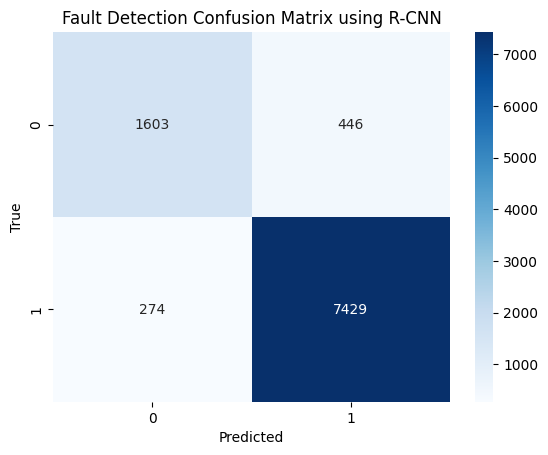

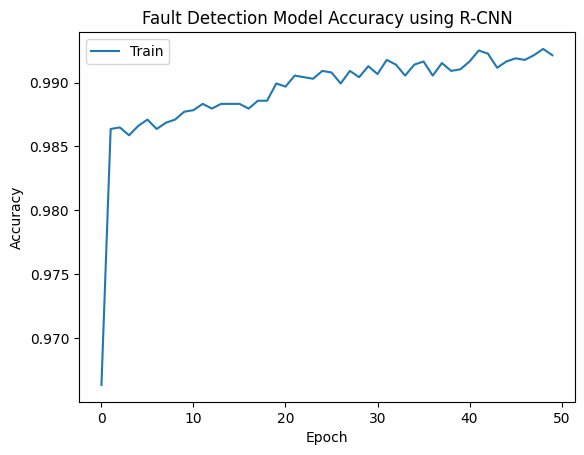

Epoch 1/50
255/255 [==============================] - 3s 4ms/step - loss: 0.1438 - accuracy: 0.9597
Epoch 2/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0479 - accuracy: 0.9856
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0447 - accuracy: 0.9860
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0425 - accuracy: 0.9860
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0397 - accuracy: 0.9865
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0361 - accuracy: 0.9870
Epoch 7/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0360 - accuracy: 0.9869
Epoch 8/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0343 - accuracy: 0.9861
Epoch 9/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0329 - accuracy: 0.9875
Epoch 10/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0317 - accuracy: 0.9874

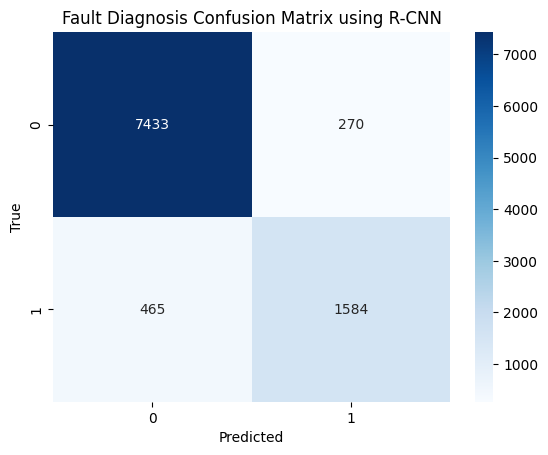

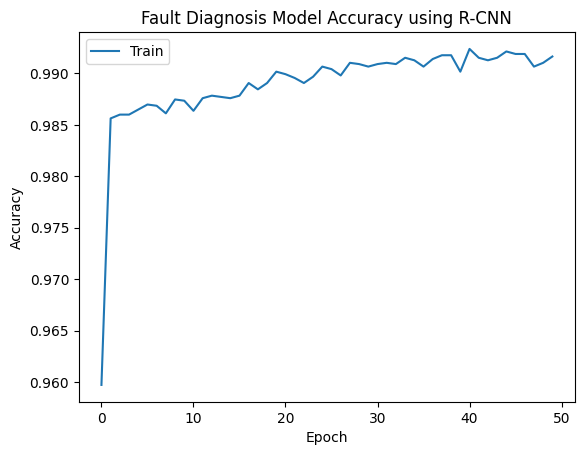

Hidden Markov Model Parameters for Fault Detection:
Number of states: 2
Starting probabilities: [0. 1.]
Transition probabilities: [[0.99671199 0.00328801]
 [0.00445544 0.99554456]]
Means of each state:
[[-0.57117984 -0.08711428 -0.61082529 -0.50411586 -0.25071924]
 [ 0.77375653  0.11801054  0.82746278  0.6829074   0.33964022]]
Covariance matrices of each state:
[[[3.61548524e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 7.84772100e-01 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.97103442e-04 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.48249800e-03
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   6.36422519e-01]]

 [[8.24239439e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 1.26736029e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.16427251e+00 0.00000000e+

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, SimpleRNN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
data_train = pd.read_csv("/content/datatraining.txt")
data_test = pd.read_csv("/content/datatest2.txt")

# Drop unnecessary columns
data_train.drop(columns=["date"], inplace=True)
data_test.drop(columns=["date"], inplace=True)

# Define fault classes based on the "Occupancy" column for both fault detection and diagnosis
data_train["Fault_Detection"] = (data_train["Occupancy"] == 0).astype(int)
data_test["Fault_Detection"] = (data_test["Occupancy"] == 0).astype(int)

data_train["Fault_Diagnosis"] = data_train["Occupancy"]
data_test["Fault_Diagnosis"] = data_test["Occupancy"]

# Separate features and target variable for fault detection
X_train_detect = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_detect = data_train["Fault_Detection"]
X_test_detect = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_detect = data_test["Fault_Detection"]

# Separate features and target variable for fault diagnosis
X_train_diag = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_diag = data_train["Fault_Diagnosis"]
X_test_diag = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_diag = data_test["Fault_Diagnosis"]

# Normalize the features for fault detection
scaler_detect = StandardScaler()
X_train_scaled_detect = scaler_detect.fit_transform(X_train_detect)
X_test_scaled_detect = scaler_detect.transform(X_test_detect)

# Normalize the features for fault diagnosis
scaler_diag = StandardScaler()
X_train_scaled_diag = scaler_diag.fit_transform(X_train_diag)
X_test_scaled_diag = scaler_diag.transform(X_test_diag)

# Fit Hidden Markov Model for fault detection
hmm_model_detect = hmm.GaussianHMM(n_components=2)
hmm_model_detect.fit(X_train_scaled_detect)

# Generate hidden states for fault detection
hidden_states_train_detect = hmm_model_detect.predict(X_train_scaled_detect)
hidden_states_test_detect = hmm_model_detect.predict(X_test_scaled_detect)

# Fit Hidden Markov Model for fault diagnosis
hmm_model_diag = hmm.GaussianHMM(n_components=3)
hmm_model_diag.fit(X_train_scaled_diag)

# Generate hidden states for fault diagnosis
hidden_states_train_diag = hmm_model_diag.predict(X_train_scaled_diag)
hidden_states_test_diag = hmm_model_diag.predict(X_test_scaled_diag)

# Convert data for R-CNN input for fault detection
X_train_rcnn_detect = X_train_scaled_detect.reshape((X_train_scaled_detect.shape[0], X_train_scaled_detect.shape[1], 1))
X_test_rcnn_detect = X_test_scaled_detect.reshape((X_test_scaled_detect.shape[0], X_test_scaled_detect.shape[1], 1))

# Convert data for R-CNN input for fault diagnosis
X_train_rcnn_diag = X_train_scaled_diag.reshape((X_train_scaled_diag.shape[0], X_train_scaled_diag.shape[1], 1))
X_test_rcnn_diag = X_test_scaled_diag.reshape((X_test_scaled_diag.shape[0], X_test_scaled_diag.shape[1], 1))

# Build and train R-CNN model for fault detection
model_rcnn_detect = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_rcnn_detect.shape[1], X_train_rcnn_detect.shape[2])),
    MaxPooling1D(pool_size=2),
    SimpleRNN(units=50),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model_rcnn_detect.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for fault detection
history_rcnn_detect = model_rcnn_detect.fit(X_train_rcnn_detect, y_train_detect, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault detection
y_pred_proba_rcnn_detect = model_rcnn_detect.predict(X_test_rcnn_detect)
y_pred_rcnn_detect = (y_pred_proba_rcnn_detect > 0.5).astype(int)  # Apply threshold for fault detection

# Calculate metrics for fault detection
accuracy_rcnn_detect = accuracy_score(y_test_detect, y_pred_rcnn_detect)
conf_matrix_rcnn_detect = confusion_matrix(y_test_detect, y_pred_rcnn_detect)
class_report_rcnn_detect = classification_report(y_test_detect, y_pred_rcnn_detect)

# Print metrics for fault detection using R-CNN
print("Fault Detection Metrics using R-CNN:")
print("Accuracy:", accuracy_rcnn_detect)
print("Confusion Matrix:")
print(conf_matrix_rcnn_detect)
print("Classification Report:")
print(class_report_rcnn_detect)

# Plot confusion matrix for fault detection using R-CNN
sns.heatmap(conf_matrix_rcnn_detect, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Detection Confusion Matrix using R-CNN")
plt.show()

# Plot training history for fault detection using R-CNN
plt.plot(history_rcnn_detect.history['accuracy'])
plt.title('Fault Detection Model Accuracy using R-CNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Build and train R-CNN model for fault diagnosis
model_rcnn_diag = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_rcnn_diag.shape[1], X_train_rcnn_diag.shape[2])),
    MaxPooling1D(pool_size=2),
    SimpleRNN(units=50),
    Dense(3, activation='softmax')  # Softmax activation for multi-class classification (3 fault classes)
])

model_rcnn_diag.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for fault diagnosis
history_rcnn_diag = model_rcnn_diag.fit(X_train_rcnn_diag, y_train_diag, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault diagnosis
y_pred_proba_rcnn_diag = model_rcnn_diag.predict(X_test_rcnn_diag)
y_pred_rcnn_diag = np.argmax(y_pred_proba_rcnn_diag, axis=1)

# Calculate metrics for fault diagnosis using R-CNN
accuracy_rcnn_diag = accuracy_score(y_test_diag, y_pred_rcnn_diag)
conf_matrix_rcnn_diag = confusion_matrix(y_test_diag, y_pred_rcnn_diag)
class_report_rcnn_diag = classification_report(y_test_diag, y_pred_rcnn_diag)

# Print metrics for fault diagnosis using R-CNN
print("Fault Diagnosis Metrics using R-CNN:")
print(class_report_rcnn_diag)

# Plot confusion matrix for fault diagnosis using R-CNN
sns.heatmap(conf_matrix_rcnn_diag, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Diagnosis Confusion Matrix using R-CNN")
plt.show()

# Plot training history for fault diagnosis using R-CNN
plt.plot(history_rcnn_diag.history['accuracy'])
plt.title('Fault Diagnosis Model Accuracy using R-CNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# Print HMM parameters for fault detection
print("Hidden Markov Model Parameters for Fault Detection:")
print("Number of states:", hmm_model_detect.n_components)
print("Starting probabilities:", hmm_model_detect.startprob_)
print("Transition probabilities:", hmm_model_detect.transmat_)
print("Means of each state:")
print(hmm_model_detect.means_)
print("Covariance matrices of each state:")
print(hmm_model_detect.covars_)

# Print HMM parameters for fault diagnosis
print("Hidden Markov Model Parameters for Fault Diagnosis:")
print("Number of states:", hmm_model_diag.n_components)
print("Starting probabilities:", hmm_model_diag.startprob_)
print("Transition probabilities:", hmm_model_diag.transmat_)
print("Means of each state:")
print(hmm_model_diag.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)


HMM AND DBN
On datatest1

Epoch 1/50
255/255 [==============================] - 5s 8ms/step - loss: 0.1243 - accuracy: 0.9571
Epoch 2/50
255/255 [==============================] - 2s 7ms/step - loss: 0.0541 - accuracy: 0.9862
Epoch 3/50
255/255 [==============================] - 1s 6ms/step - loss: 0.0487 - accuracy: 0.9875
Epoch 4/50
255/255 [==============================] - 2s 6ms/step - loss: 0.0447 - accuracy: 0.9865
Epoch 5/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0419 - accuracy: 0.9875
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0401 - accuracy: 0.9881
Epoch 7/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0392 - accuracy: 0.9875
Epoch 8/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0368 - accuracy: 0.9877
Epoch 9/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0345 - accuracy: 0.9882
Epoch 10/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0345 - accuracy: 0.9883

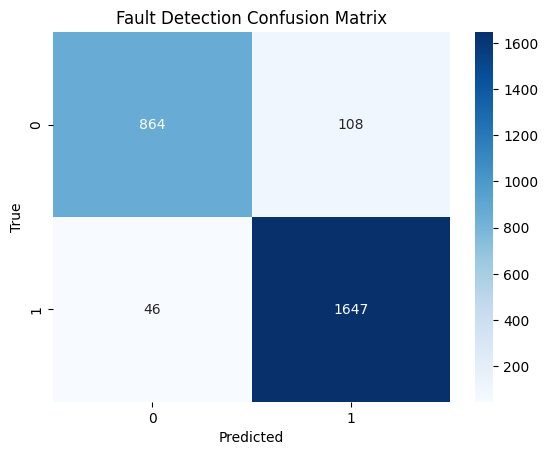

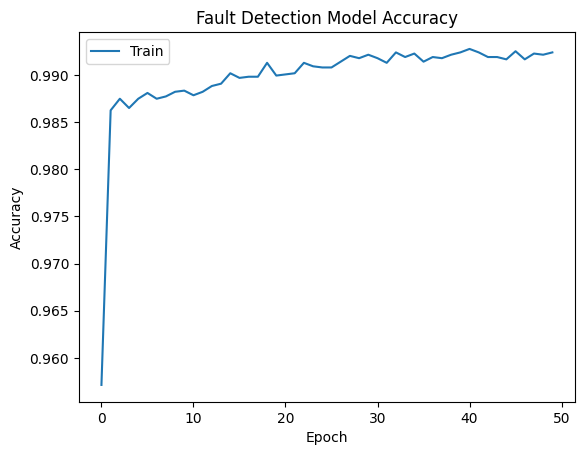

Epoch 1/50
255/255 [==============================] - 2s 3ms/step - loss: 0.1494 - accuracy: 0.9672
Epoch 2/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0513 - accuracy: 0.9874
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0461 - accuracy: 0.9865
Epoch 4/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0420 - accuracy: 0.9869
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0391 - accuracy: 0.9865
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0374 - accuracy: 0.9864
Epoch 7/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0355 - accuracy: 0.9880
Epoch 8/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0350 - accuracy: 0.9866
Epoch 9/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0327 - accuracy: 0.9878
Epoch 10/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0319 - accuracy: 0.9878

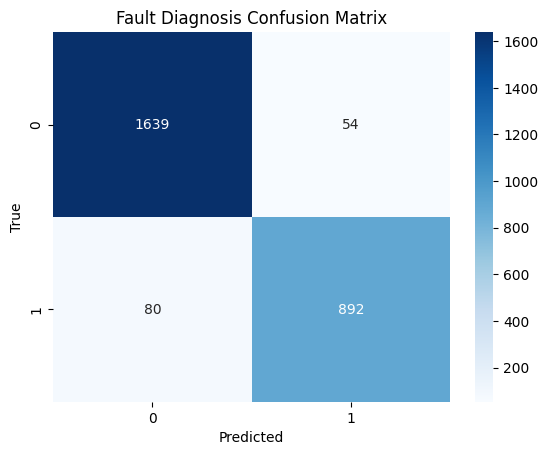

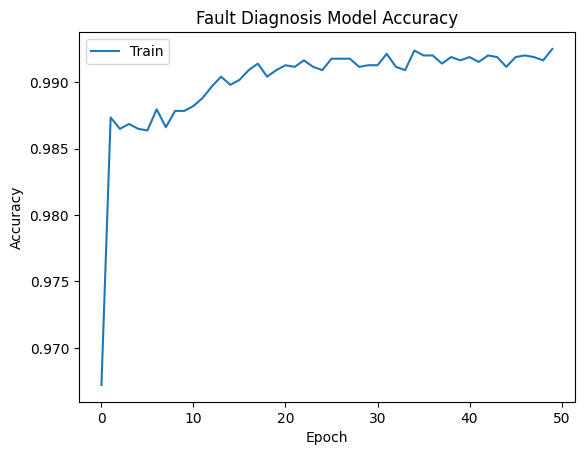

Hidden Markov Model Parameters for Fault Detection:
Number of states: 2
Starting probabilities: [0. 1.]
Transition probabilities: [[0.99647223 0.00352777]
 [0.00452715 0.99547285]]
Means of each state:
[[-0.55627119 -0.09924921 -0.61276237 -0.5025847  -0.25748694]
 [ 0.71365745  0.12732987  0.78613173  0.64478139  0.33033792]]
Covariance matrices of each state:
[[[3.58958817e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 7.83563232e-01 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 4.57764202e-05 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.52599156e-03
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   6.41877970e-01]]

 [[9.16123069e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 1.24882872e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.18316265e+00 0.00000000e+

TypeError: Cannot clone object '<keras.src.engine.sequential.Sequential object at 0x793edaa0d4e0>' (type <class 'keras.src.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone

# Load the datasets
data_train = pd.read_csv("/content/datatraining.txt")
data_test = pd.read_csv("/content/datatest.txt")

# Drop unnecessary columns
data_train.drop(columns=["date"], inplace=True)
data_test.drop(columns=["date"], inplace=True)

# Define fault classes based on the "Occupancy" column for both fault detection and diagnosis
data_train["Fault_Detection"] = (data_train["Occupancy"] == 0).astype(int)
data_test["Fault_Detection"] = (data_test["Occupancy"] == 0).astype(int)

data_train["Fault_Diagnosis"] = data_train["Occupancy"]
data_test["Fault_Diagnosis"] = data_test["Occupancy"]

# Separate features and target variable for fault detection
X_train_detect = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_detect = data_train["Fault_Detection"]
X_test_detect = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_detect = data_test["Fault_Detection"]

# Separate features and target variable for fault diagnosis
X_train_diag = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_diag = data_train["Fault_Diagnosis"]
X_test_diag = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_diag = data_test["Fault_Diagnosis"]

# Normalize the features for fault detection
scaler_detect = StandardScaler()
X_train_scaled_detect = scaler_detect.fit_transform(X_train_detect)
X_test_scaled_detect = scaler_detect.transform(X_test_detect)

# Normalize the features for fault diagnosis
scaler_diag = StandardScaler()
X_train_scaled_diag = scaler_diag.fit_transform(X_train_diag)
X_test_scaled_diag = scaler_diag.transform(X_test_diag)

# Fit Hidden Markov Model for fault detection
hmm_model_detect = hmm.GaussianHMM(n_components=2)
hmm_model_detect.fit(X_train_scaled_detect)

# Generate hidden states for fault detection
hidden_states_train_detect = hmm_model_detect.predict(X_train_scaled_detect)
hidden_states_test_detect = hmm_model_detect.predict(X_test_scaled_detect)

# Fit Hidden Markov Model for fault diagnosis
hmm_model_diag = hmm.GaussianHMM(n_components=3)
hmm_model_diag.fit(X_train_scaled_diag)

# Generate hidden states for fault diagnosis
hidden_states_train_diag = hmm_model_diag.predict(X_train_scaled_diag)
hidden_states_test_diag = hmm_model_diag.predict(X_test_scaled_diag)

# Convert data for RNN input for fault detection
X_train_rnn_detect = X_train_scaled_detect.reshape((X_train_scaled_detect.shape[0], X_train_scaled_detect.shape[1], 1))
X_test_rnn_detect = X_test_scaled_detect.reshape((X_test_scaled_detect.shape[0], X_test_scaled_detect.shape[1], 1))

# Convert data for RNN input for fault diagnosis
X_train_rnn_diag = X_train_scaled_diag.reshape((X_train_scaled_diag.shape[0], X_train_scaled_diag.shape[1], 1))
X_test_rnn_diag = X_test_scaled_diag.reshape((X_test_scaled_diag.shape[0], X_test_scaled_diag.shape[1], 1))

# Build and train RNN model for fault detection
model_detect = Sequential([
    SimpleRNN(units=50, input_shape=(X_train_rnn_detect.shape[1], X_train_rnn_detect.shape[2])),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model_detect.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for fault detection
history_detect = model_detect.fit(X_train_rnn_detect, y_train_detect, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault detection
y_pred_proba_detect = model_detect.predict(X_test_rnn_detect)
y_pred_detect = (y_pred_proba_detect > 0.5).astype(int)  # Apply threshold for fault detection

# Calculate metrics for fault detection
accuracy_detect = accuracy_score(y_test_detect, y_pred_detect)
conf_matrix_detect = confusion_matrix(y_test_detect, y_pred_detect)
class_report_detect = classification_report(y_test_detect, y_pred_detect)

# Print metrics for fault detection
print("Fault Detection Metrics:")
print("Accuracy:", accuracy_detect)
print("Confusion Matrix:")
print(conf_matrix_detect)
print("Classification Report:")
print(class_report_detect)

# Plot confusion matrix for fault detection
sns.heatmap(conf_matrix_detect, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Detection Confusion Matrix")
plt.show()

# Plot training history for fault detection
plt.plot(history_detect.history['accuracy'])
plt.title('Fault Detection Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Build and train RNN model for fault diagnosis
model_diag = Sequential([
    SimpleRNN(units=50, input_shape=(X_train_rnn_diag.shape[1], X_train_rnn_diag.shape[2])),
    Dense(3, activation='softmax')  # Softmax activation for multi-class classification (3 fault classes)
])

model_diag.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for fault diagnosis
history_diag = model_diag.fit(X_train_rnn_diag, y_train_diag, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault diagnosis
y_pred_proba_diag = model_diag.predict(X_test_rnn_diag)
y_pred_diag = np.argmax(y_pred_proba_diag, axis=1)

# Calculate metrics for fault diagnosis
accuracy_diag = accuracy_score(y_test_diag, y_pred_diag)
conf_matrix_diag = confusion_matrix(y_test_diag, y_pred_diag)
class_report_diag = classification_report(y_test_diag, y_pred_diag)

# Print metrics for fault diagnosis
print("Fault Diagnosis Metrics:")
print("Accuracy:", accuracy_diag)
print("Confusion Matrix:")
print(conf_matrix_diag)
print("Classification Report:")
print(class_report_diag)

# Plot confusion matrix for fault diagnosis
sns.heatmap(conf_matrix_diag, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Diagnosis Confusion Matrix")
plt.show()

# Plot training history for fault diagnosis
plt.plot(history_diag.history['accuracy'])
plt.title('Fault Diagnosis Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Print HMM parameters for fault detection
print("Hidden Markov Model Parameters for Fault Detection:")
print("Number of states:", hmm_model_detect.n_components)
print("Starting probabilities:", hmm_model_detect.startprob_)
print("Transition probabilities:", hmm_model_detect.transmat_)
print("Means of each state:")
print(hmm_model_detect.means_)
print("Covariance matrices of each state:")
print(hmm_model_detect.covars_)

# Print HMM parameters for fault diagnosis
print("Hidden Markov Model Parameters for Fault Diagnosis:")
print("Number of states:", hmm_model_diag.n_components)
print("Starting probabilities:", hmm_model_diag.startprob_)
print("Transition probabilities:", hmm_model_diag.transmat_)
print("Means of each state:")
print(hmm_model_diag.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)

# Build and train DBN model for fault detection
dbn_detect = Pipeline(steps=[
    ('rbm', BernoulliRBM(n_components=100, learning_rate=0.01, n_iter=20, verbose=1)),
    ('classifier', clone(model_detect))  # Using the RNN model for classification in DBN
])

# Train the DBN model for fault detection
dbn_detect.fit(X_train_scaled_detect, y_train_detect)

# Evaluate the DBN model for fault detection
y_pred_dbn_detect = dbn_detect.predict(X_test_scaled_detect)

# Calculate metrics for DBN-based fault detection
accuracy_dbn_detect = accuracy_score(y_test_detect, y_pred_dbn_detect)
conf_matrix_dbn_detect = confusion_matrix(y_test_detect, y_pred_dbn_detect)
class_report_dbn_detect = classification_report(y_test_detect, y_pred_dbn_detect)

# Print metrics for DBN-based fault detection
print("DBN-Based Fault Detection Metrics:")
print("Accuracy:", accuracy_dbn_detect)
print("Confusion Matrix:")
print(conf_matrix_dbn_detect)
print("Classification Report:")
print(class_report_dbn_detect)

# Plot confusion matrix for DBN-based fault detection
sns.heatmap(conf_matrix_dbn_detect, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("DBN-Based Fault Detection Confusion Matrix")
plt.show()

# Build and train DBN model for fault diagnosis
dbn_diag = Pipeline(steps=[
    ('rbm', BernoulliRBM(n_components=100, learning_rate=0.01, n_iter=20, verbose=1)),
    ('classifier', clone(model_diag))  # Using the RNN model for classification in DBN
])

# Train the DBN model for fault diagnosis
dbn_diag.fit(X_train_scaled_diag, y_train_diag)

# Evaluate the DBN model for fault diagnosis
y_pred_dbn_diag = dbn_diag.predict(X_test_scaled_diag)

# Calculate metrics for DBN-based fault diagnosis
accuracy_dbn_diag = accuracy_score(y_test_diag, y_pred_dbn_diag)
conf_matrix_dbn_diag = confusion_matrix(y_test_diag, y_pred_dbn_diag)
class_report_dbn_diag = classification_report(y_test_diag, y_pred_dbn_diag)

# Print metrics for DBN-based fault diagnosis
print("DBN-Based Fault Diagnosis Metrics:")
print("Accuracy:", accuracy_dbn_diag)
print("Confusion Matrix:")
print(conf_matrix_dbn_diag)
print("Classification Report:")
print(class_report_dbn_diag)

# Plot confusion matrix for DBN-based fault diagnosis
sns.heatmap(conf_matrix_dbn_diag, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("DBN-Based Fault Diagnosis Confusion Matrix")
plt.show()


On datatest2

Epoch 1/50
255/255 [==============================] - 3s 5ms/step - loss: 0.1071 - accuracy: 0.9695
Epoch 2/50
255/255 [==============================] - 2s 7ms/step - loss: 0.0501 - accuracy: 0.9869
Epoch 3/50
255/255 [==============================] - 2s 7ms/step - loss: 0.0466 - accuracy: 0.9870
Epoch 4/50
255/255 [==============================] - 2s 7ms/step - loss: 0.0435 - accuracy: 0.9869
Epoch 5/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0417 - accuracy: 0.9880
Epoch 6/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0392 - accuracy: 0.9871
Epoch 7/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0386 - accuracy: 0.9880
Epoch 8/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0366 - accuracy: 0.9871
Epoch 9/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0354 - accuracy: 0.9871
Epoch 10/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0331 - accuracy: 0.9877

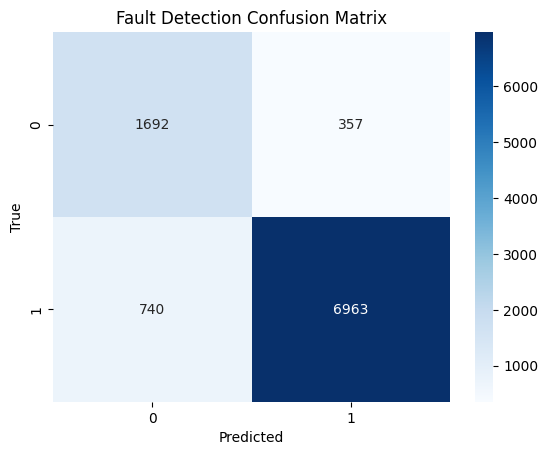

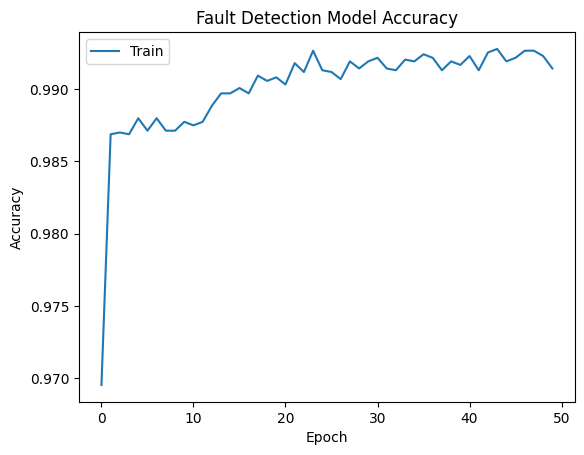

Epoch 1/50
255/255 [==============================] - 2s 3ms/step - loss: 0.1397 - accuracy: 0.9724
Epoch 2/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0510 - accuracy: 0.9869
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0467 - accuracy: 0.9874
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0435 - accuracy: 0.9874
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0404 - accuracy: 0.9871
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0388 - accuracy: 0.9874
Epoch 7/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0373 - accuracy: 0.9876
Epoch 8/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0359 - accuracy: 0.9876
Epoch 9/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0349 - accuracy: 0.9869
Epoch 10/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0323 - accuracy: 0.9885

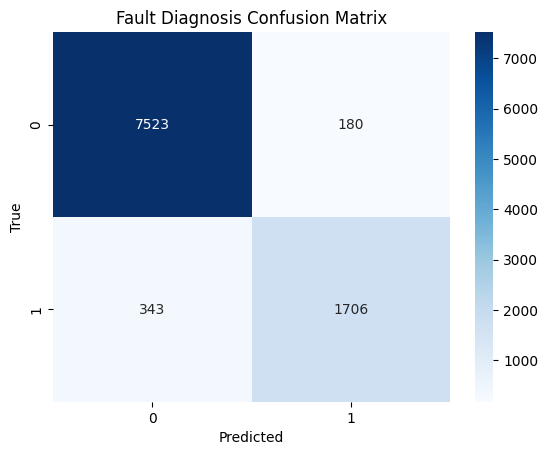

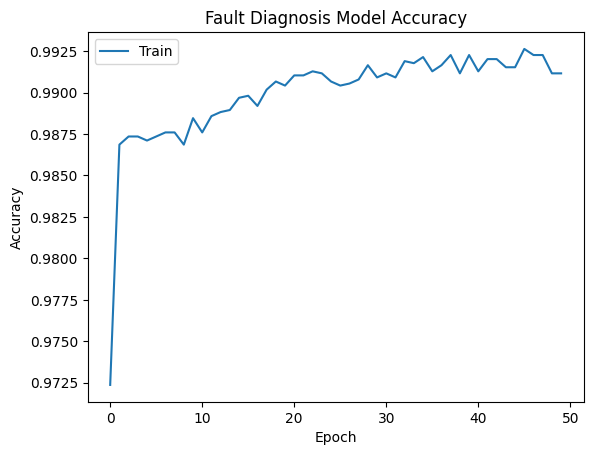

Hidden Markov Model Parameters for Fault Detection:
Number of states: 2
Starting probabilities: [1. 0.]
Transition probabilities: [[0.99653379 0.00346621]
 [0.00261009 0.99738991]]
Means of each state:
[[ 0.74780078  0.12340315  0.81204554  0.66844151  0.33704634]
 [-0.56326361 -0.09295056 -0.61165449 -0.50348808 -0.25387235]]
Covariance matrices of each state:
[[[8.67901950e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 1.25950350e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.17135294e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.54093740e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   1.28089108e+00]]

 [[3.61029231e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 7.84429110e-01 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.24160371e-04 0.00000000e+

TypeError: Cannot clone object '<keras.src.engine.sequential.Sequential object at 0x793edb00db70>' (type <class 'keras.src.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone

# Load the datasets
data_train = pd.read_csv("/content/datatraining.txt")
data_test = pd.read_csv("/content/datatest2.txt")

# Drop unnecessary columns
data_train.drop(columns=["date"], inplace=True)
data_test.drop(columns=["date"], inplace=True)

# Define fault classes based on the "Occupancy" column for both fault detection and diagnosis
data_train["Fault_Detection"] = (data_train["Occupancy"] == 0).astype(int)
data_test["Fault_Detection"] = (data_test["Occupancy"] == 0).astype(int)

data_train["Fault_Diagnosis"] = data_train["Occupancy"]
data_test["Fault_Diagnosis"] = data_test["Occupancy"]

# Separate features and target variable for fault detection
X_train_detect = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_detect = data_train["Fault_Detection"]
X_test_detect = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_detect = data_test["Fault_Detection"]

# Separate features and target variable for fault diagnosis
X_train_diag = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_diag = data_train["Fault_Diagnosis"]
X_test_diag = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_diag = data_test["Fault_Diagnosis"]

# Normalize the features for fault detection
scaler_detect = StandardScaler()
X_train_scaled_detect = scaler_detect.fit_transform(X_train_detect)
X_test_scaled_detect = scaler_detect.transform(X_test_detect)

# Normalize the features for fault diagnosis
scaler_diag = StandardScaler()
X_train_scaled_diag = scaler_diag.fit_transform(X_train_diag)
X_test_scaled_diag = scaler_diag.transform(X_test_diag)

# Fit Hidden Markov Model for fault detection
hmm_model_detect = hmm.GaussianHMM(n_components=2)
hmm_model_detect.fit(X_train_scaled_detect)

# Generate hidden states for fault detection
hidden_states_train_detect = hmm_model_detect.predict(X_train_scaled_detect)
hidden_states_test_detect = hmm_model_detect.predict(X_test_scaled_detect)

# Fit Hidden Markov Model for fault diagnosis
hmm_model_diag = hmm.GaussianHMM(n_components=3)
hmm_model_diag.fit(X_train_scaled_diag)

# Generate hidden states for fault diagnosis
hidden_states_train_diag = hmm_model_diag.predict(X_train_scaled_diag)
hidden_states_test_diag = hmm_model_diag.predict(X_test_scaled_diag)

# Convert data for RNN input for fault detection
X_train_rnn_detect = X_train_scaled_detect.reshape((X_train_scaled_detect.shape[0], X_train_scaled_detect.shape[1], 1))
X_test_rnn_detect = X_test_scaled_detect.reshape((X_test_scaled_detect.shape[0], X_test_scaled_detect.shape[1], 1))

# Convert data for RNN input for fault diagnosis
X_train_rnn_diag = X_train_scaled_diag.reshape((X_train_scaled_diag.shape[0], X_train_scaled_diag.shape[1], 1))
X_test_rnn_diag = X_test_scaled_diag.reshape((X_test_scaled_diag.shape[0], X_test_scaled_diag.shape[1], 1))

# Build and train RNN model for fault detection
model_detect = Sequential([
    SimpleRNN(units=50, input_shape=(X_train_rnn_detect.shape[1], X_train_rnn_detect.shape[2])),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model_detect.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for fault detection
history_detect = model_detect.fit(X_train_rnn_detect, y_train_detect, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault detection
y_pred_proba_detect = model_detect.predict(X_test_rnn_detect)
y_pred_detect = (y_pred_proba_detect > 0.5).astype(int)  # Apply threshold for fault detection

# Calculate metrics for fault detection
accuracy_detect = accuracy_score(y_test_detect, y_pred_detect)
conf_matrix_detect = confusion_matrix(y_test_detect, y_pred_detect)
class_report_detect = classification_report(y_test_detect, y_pred_detect)

# Print metrics for fault detection
print("Fault Detection Metrics:")
print("Accuracy:", accuracy_detect)
print("Confusion Matrix:")
print(conf_matrix_detect)
print("Classification Report:")
print(class_report_detect)

# Plot confusion matrix for fault detection
sns.heatmap(conf_matrix_detect, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Detection Confusion Matrix")
plt.show()

# Plot training history for fault detection
plt.plot(history_detect.history['accuracy'])
plt.title('Fault Detection Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Build and train RNN model for fault diagnosis
model_diag = Sequential([
    SimpleRNN(units=50, input_shape=(X_train_rnn_diag.shape[1], X_train_rnn_diag.shape[2])),
    Dense(3, activation='softmax')  # Softmax activation for multi-class classification (3 fault classes)
])

model_diag.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for fault diagnosis
history_diag = model_diag.fit(X_train_rnn_diag, y_train_diag, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault diagnosis
y_pred_proba_diag = model_diag.predict(X_test_rnn_diag)
y_pred_diag = np.argmax(y_pred_proba_diag, axis=1)

# Calculate metrics for fault diagnosis
accuracy_diag = accuracy_score(y_test_diag, y_pred_diag)
conf_matrix_diag = confusion_matrix(y_test_diag, y_pred_diag)
class_report_diag = classification_report(y_test_diag, y_pred_diag)

# Print metrics for fault diagnosis
print("Fault Diagnosis Metrics:")
print("Accuracy:", accuracy_diag)
print("Confusion Matrix:")
print(conf_matrix_diag)
print("Classification Report:")
print(class_report_diag)

# Plot confusion matrix for fault diagnosis
sns.heatmap(conf_matrix_diag, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Diagnosis Confusion Matrix")
plt.show()

# Plot training history for fault diagnosis
plt.plot(history_diag.history['accuracy'])
plt.title('Fault Diagnosis Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Print HMM parameters for fault detection
print("Hidden Markov Model Parameters for Fault Detection:")
print("Number of states:", hmm_model_detect.n_components)
print("Starting probabilities:", hmm_model_detect.startprob_)
print("Transition probabilities:", hmm_model_detect.transmat_)
print("Means of each state:")
print(hmm_model_detect.means_)
print("Covariance matrices of each state:")
print(hmm_model_detect.covars_)

# Print HMM parameters for fault diagnosis
print("Hidden Markov Model Parameters for Fault Diagnosis:")
print("Number of states:", hmm_model_diag.n_components)
print("Starting probabilities:", hmm_model_diag.startprob_)
print("Transition probabilities:", hmm_model_diag.transmat_)
print("Means of each state:")
print(hmm_model_diag.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)

# Build and train DBN model for fault detection
dbn_detect = Pipeline(steps=[
    ('rbm', BernoulliRBM(n_components=100, learning_rate=0.01, n_iter=20, verbose=1)),
    ('classifier', clone(model_detect))  # Using the RNN model for classification in DBN
])

# Train the DBN model for fault detection
dbn_detect.fit(X_train_scaled_detect, y_train_detect)

# Evaluate the DBN model for fault detection
y_pred_dbn_detect = dbn_detect.predict(X_test_scaled_detect)

# Calculate metrics for DBN-based fault detection
accuracy_dbn_detect = accuracy_score(y_test_detect, y_pred_dbn_detect)
conf_matrix_dbn_detect = confusion_matrix(y_test_detect, y_pred_dbn_detect)
class_report_dbn_detect = classification_report(y_test_detect, y_pred_dbn_detect)

# Print metrics for DBN-based fault detection
print("DBN-Based Fault Detection Metrics:")
print("Accuracy:", accuracy_dbn_detect)
print("Confusion Matrix:")
print(conf_matrix_dbn_detect)
print("Classification Report:")
print(class_report_dbn_detect)

# Plot confusion matrix for DBN-based fault detection
sns.heatmap(conf_matrix_dbn_detect, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("DBN-Based Fault Detection Confusion Matrix")
plt.show()

# Build and train DBN model for fault diagnosis
dbn_diag = Pipeline(steps=[
    ('rbm', BernoulliRBM(n_components=100, learning_rate=0.01, n_iter=20, verbose=1)),
    ('classifier', clone(model_diag))  # Using the RNN model for classification in DBN
])

# Train the DBN model for fault diagnosis
dbn_diag.fit(X_train_scaled_diag, y_train_diag)

# Evaluate the DBN model for fault diagnosis
y_pred_dbn_diag = dbn_diag.predict(X_test_scaled_diag)

# Calculate metrics for DBN-based fault diagnosis
accuracy_dbn_diag = accuracy_score(y_test_diag, y_pred_dbn_diag)
conf_matrix_dbn_diag = confusion_matrix(y_test_diag, y_pred_dbn_diag)
class_report_dbn_diag = classification_report(y_test_diag, y_pred_dbn_diag)

# Print metrics for DBN-based fault diagnosis
print("DBN-Based Fault Diagnosis Metrics:")
print("Accuracy:", accuracy_dbn_diag)
print("Confusion Matrix:")
print(conf_matrix_dbn_diag)
print("Classification Report:")
print(class_report_dbn_diag)

# Plot confusion matrix for DBN-based fault diagnosis
sns.heatmap(conf_matrix_dbn_diag, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("DBN-Based Fault Diagnosis Confusion Matrix")
plt.show()


In [ ]:
!pip install pandas numpy scikit-learn tensorflow matplotlib seaborn


In [ ]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.4 MB/s eta 0:00:00


HMM AND GAN
On datatest1

Epoch 1/50
255/255 [==============================] - 2s 3ms/step - loss: 0.1195 - accuracy: 0.9643
Epoch 2/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0515 - accuracy: 0.9866
Epoch 3/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0469 - accuracy: 0.9869
Epoch 4/50
255/255 [==============================] - 1s 6ms/step - loss: 0.0435 - accuracy: 0.9865
Epoch 5/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0407 - accuracy: 0.9870
Epoch 6/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0387 - accuracy: 0.9867
Epoch 7/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0375 - accuracy: 0.9864
Epoch 8/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0356 - accuracy: 0.9871
Epoch 9/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0339 - accuracy: 0.9874
Epoch 10/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0339 - accuracy: 0.9875

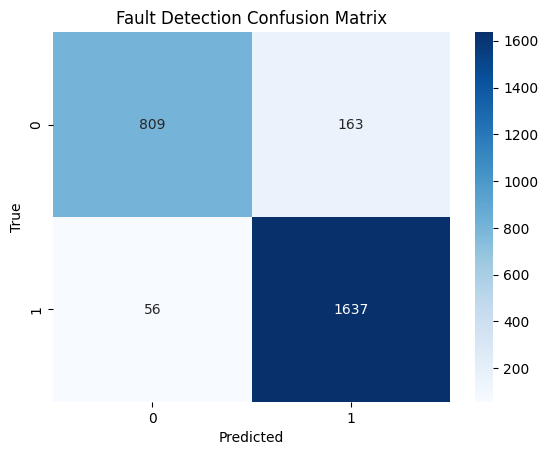

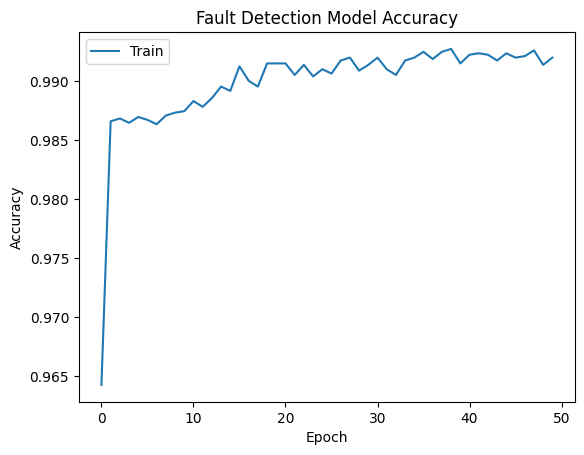

Epoch 1/50
255/255 [==============================] - 2s 4ms/step - loss: 0.1521 - accuracy: 0.9568
Epoch 2/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0508 - accuracy: 0.9875
Epoch 3/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0454 - accuracy: 0.9864
Epoch 4/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0420 - accuracy: 0.9876
Epoch 5/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0405 - accuracy: 0.9869
Epoch 6/50
255/255 [==============================] - 1s 6ms/step - loss: 0.0380 - accuracy: 0.9872
Epoch 7/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0370 - accuracy: 0.9871
Epoch 8/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0362 - accuracy: 0.9875
Epoch 9/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0353 - accuracy: 0.9874
Epoch 10/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0345 - accuracy: 0.9871

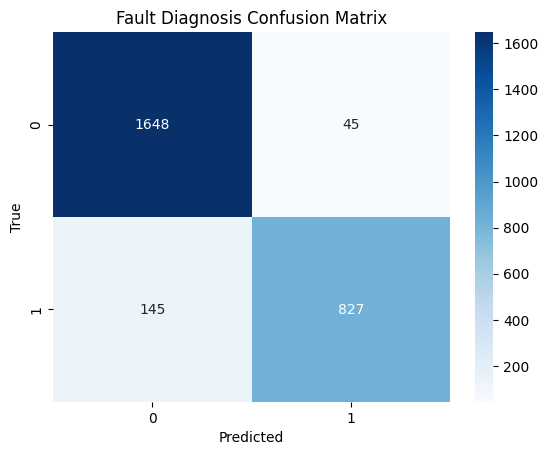

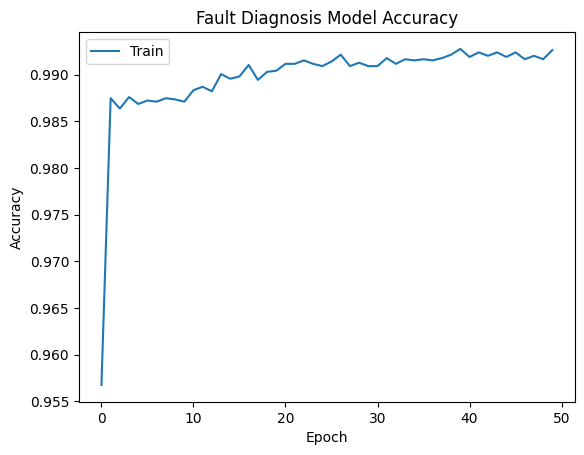

Hidden Markov Model Parameters for Fault Detection:
Number of states: 2
Starting probabilities: [1. 0.]
Transition probabilities: [[0.99547251 0.00452749]
 [0.00352778 0.99647222]]
Means of each state:
[[ 0.71373277  0.12733189  0.78618481  0.64482922  0.33036211]
 [-0.55629032 -0.09924372 -0.61276015 -0.50258622 -0.25748747]]
Covariance matrices of each state:
[[[9.16414693e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 1.71309676e-02 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 3.31171576e-01 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.46743242e-03
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   1.85818180e-02]]

 [[6.42864352e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 1.05553670e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.21858239e+00 0.00000000e+

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
data_train = pd.read_csv("/content/datatraining.txt")
data_test = pd.read_csv("/content/datatest.txt")

# Drop unnecessary columns
data_train.drop(columns=["date"], inplace=True)
data_test.drop(columns=["date"], inplace=True)

# Define fault classes based on the "Occupancy" column for both fault detection and diagnosis
data_train["Fault_Detection"] = (data_train["Occupancy"] == 0).astype(int)
data_test["Fault_Detection"] = (data_test["Occupancy"] == 0).astype(int)

data_train["Fault_Diagnosis"] = data_train["Occupancy"]
data_test["Fault_Diagnosis"] = data_test["Occupancy"]

# Separate features and target variable for fault detection
X_train_detect = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_detect = data_train["Fault_Detection"]
X_test_detect = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_detect = data_test["Fault_Detection"]

# Separate features and target variable for fault diagnosis
X_train_diag = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_diag = data_train["Fault_Diagnosis"]
X_test_diag = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_diag = data_test["Fault_Diagnosis"]

# Normalize the features for fault detection
scaler_detect = StandardScaler()
X_train_scaled_detect = scaler_detect.fit_transform(X_train_detect)
X_test_scaled_detect = scaler_detect.transform(X_test_detect)

# Normalize the features for fault diagnosis
scaler_diag = StandardScaler()
X_train_scaled_diag = scaler_diag.fit_transform(X_train_diag)
X_test_scaled_diag = scaler_diag.transform(X_test_diag)

# Fit Hidden Markov Model for fault detection
hmm_model_detect = hmm.GaussianHMM(n_components=2)
hmm_model_detect.fit(X_train_scaled_detect)

# Generate hidden states for fault detection
hidden_states_train_detect = hmm_model_detect.predict(X_train_scaled_detect)
hidden_states_test_detect = hmm_model_detect.predict(X_test_scaled_detect)

# Fit Hidden Markov Model for fault diagnosis
hmm_model_diag = hmm.GaussianHMM(n_components=3)
hmm_model_diag.fit(X_train_scaled_diag)

# Generate hidden states for fault diagnosis
hidden_states_train_diag = hmm_model_diag.predict(X_train_scaled_diag)
hidden_states_test_diag = hmm_model_diag.predict(X_test_scaled_diag)

# Convert data for RNN input for fault detection
X_train_rnn_detect = X_train_scaled_detect.reshape((X_train_scaled_detect.shape[0], X_train_scaled_detect.shape[1], 1))
X_test_rnn_detect = X_test_scaled_detect.reshape((X_test_scaled_detect.shape[0], X_test_scaled_detect.shape[1], 1))

# Convert data for RNN input for fault diagnosis
X_train_rnn_diag = X_train_scaled_diag.reshape((X_train_scaled_diag.shape[0], X_train_scaled_diag.shape[1], 1))
X_test_rnn_diag = X_test_scaled_diag.reshape((X_test_scaled_diag.shape[0], X_test_scaled_diag.shape[1], 1))

# Build and train RNN model for fault detection
model_detect = Sequential([
    SimpleRNN(units=50, input_shape=(X_train_rnn_detect.shape[1], X_train_rnn_detect.shape[2])),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model_detect.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for fault detection
history_detect = model_detect.fit(X_train_rnn_detect, y_train_detect, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault detection
y_pred_proba_detect = model_detect.predict(X_test_rnn_detect)
y_pred_detect = (y_pred_proba_detect > 0.5).astype(int)  # Apply threshold for fault detection

# Calculate metrics for fault detection
accuracy_detect = accuracy_score(y_test_detect, y_pred_detect)
conf_matrix_detect = confusion_matrix(y_test_detect, y_pred_detect)
class_report_detect = classification_report(y_test_detect, y_pred_detect)

# Print metrics for fault detection
print("Fault Detection Metrics:")
print("Accuracy:", accuracy_detect)
print("Confusion Matrix:")
print(conf_matrix_detect)
print("Classification Report:")
print(class_report_detect)

# Plot confusion matrix for fault detection
sns.heatmap(conf_matrix_detect, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Detection Confusion Matrix")
plt.show()

# Plot training history for fault detection
plt.plot(history_detect.history['accuracy'])
plt.title('Fault Detection Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Build and train RNN model for fault diagnosis
model_diag = Sequential([
    SimpleRNN(units=50, input_shape=(X_train_rnn_diag.shape[1], X_train_rnn_diag.shape[2])),
    Dense(3, activation='softmax')  # Softmax activation for multi-class classification (3 fault classes)
])

model_diag.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for fault diagnosis
history_diag = model_diag.fit(X_train_rnn_diag, y_train_diag, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault diagnosis
y_pred_proba_diag = model_diag.predict(X_test_rnn_diag)
y_pred_diag = np.argmax(y_pred_proba_diag, axis=1)

# Calculate metrics for fault diagnosis
accuracy_diag = accuracy_score(y_test_diag, y_pred_diag)
conf_matrix_diag = confusion_matrix(y_test_diag, y_pred_diag)
class_report_diag = classification_report(y_test_diag, y_pred_diag)

# Print metrics for fault diagnosis
print("Fault Diagnosis Metrics:")
print("Accuracy:", accuracy_diag)
print("Confusion Matrix:")
print(conf_matrix_diag)
print("Classification Report:")
print(class_report_diag)

# Plot confusion matrix for fault diagnosis
sns.heatmap(conf_matrix_diag, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Diagnosis Confusion Matrix")
plt.show()

# Plot training history for fault diagnosis
plt.plot(history_diag.history['accuracy'])
plt.title('Fault Diagnosis Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Print HMM parameters for fault detection
print("Hidden Markov Model Parameters for Fault Detection:")
print("Number of states:", hmm_model_detect.n_components)
print("Starting probabilities:", hmm_model_detect.startprob_)
print("Transition probabilities:", hmm_model_detect.transmat_)
print("Means of each state:")
print(hmm_model_detect.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)

# Print HMM parameters for fault diagnosis
print("Hidden Markov Model Parameters for Fault Diagnosis:")
print("Number of states:", hmm_model_diag.n_components)
print("Starting probabilities:", hmm_model_diag.startprob_)
print("Transition probabilities:", hmm_model_diag.transmat_)
print("Means of each state:")
print(hmm_model_diag.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)


On datatest2

Epoch 1/50
255/255 [==============================] - 2s 4ms/step - loss: 0.0951 - accuracy: 0.9761
Epoch 2/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0501 - accuracy: 0.9870
Epoch 3/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0447 - accuracy: 0.9871
Epoch 4/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0413 - accuracy: 0.9875
Epoch 5/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0397 - accuracy: 0.9875
Epoch 6/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0382 - accuracy: 0.9875
Epoch 7/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0376 - accuracy: 0.9869
Epoch 8/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0340 - accuracy: 0.9875
Epoch 9/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0332 - accuracy: 0.9874
Epoch 10/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9882

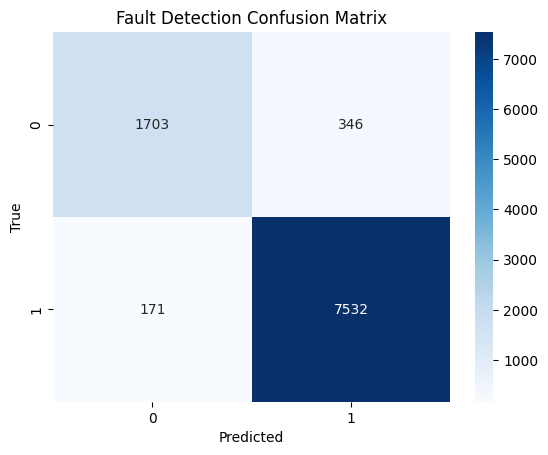

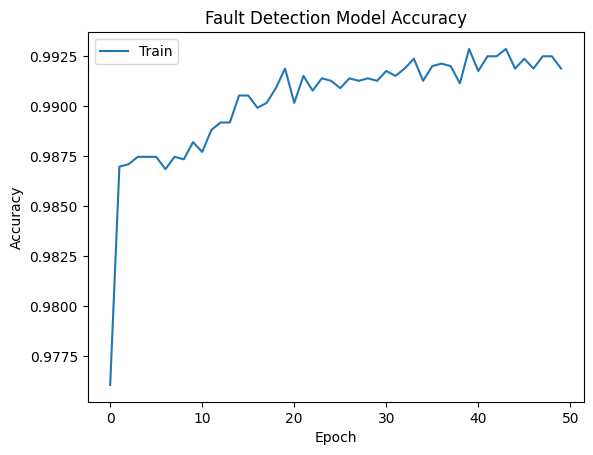

Epoch 1/50
255/255 [==============================] - 2s 4ms/step - loss: 0.1531 - accuracy: 0.9580
Epoch 2/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0534 - accuracy: 0.9877
Epoch 3/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0488 - accuracy: 0.9866
Epoch 4/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0458 - accuracy: 0.9867
Epoch 5/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0419 - accuracy: 0.9871
Epoch 6/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0394 - accuracy: 0.9871
Epoch 7/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0374 - accuracy: 0.9870
Epoch 8/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0365 - accuracy: 0.9882
Epoch 9/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0352 - accuracy: 0.9874
Epoch 10/50
255/255 [==============================] - 1s 6ms/step - loss: 0.0335 - accuracy: 0.9871

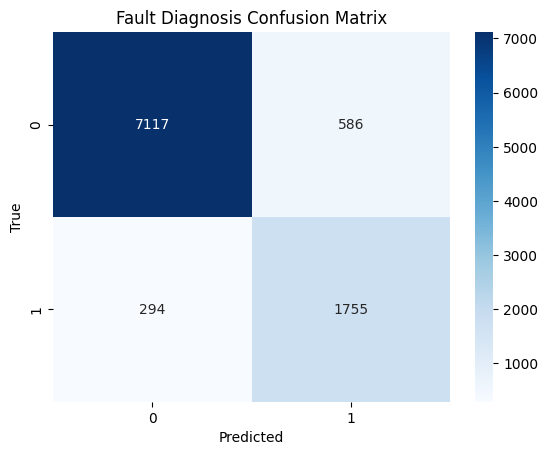

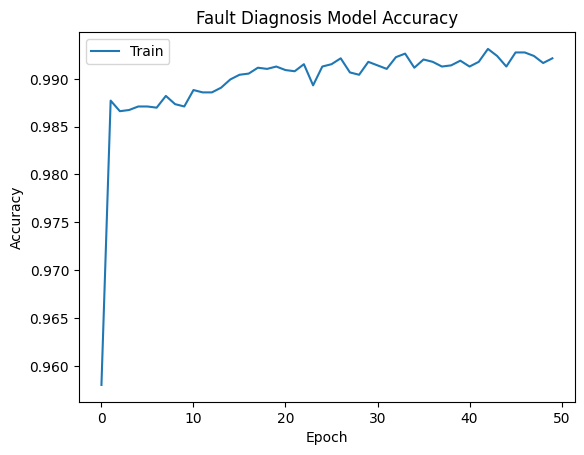

Hidden Markov Model Parameters for Fault Detection:
Number of states: 2
Starting probabilities: [0. 1.]
Transition probabilities: [[0.99645192 0.00354808]
 [0.00455666 0.99544334]]
Means of each state:
[[-0.55653602 -0.09907937 -0.61273638 -0.50261363 -0.25740956]
 [ 0.71453648  0.12720798  0.78669211  0.64530554  0.33048808]]
Covariance matrices of each state:
[[[8.93750470e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 1.81486575e-02 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 3.35721803e-01 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.24536904e-03
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   1.98573398e-02]]

 [[6.18050024e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 1.05314725e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.19791543e+00 0.00000000e+

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
data_train = pd.read_csv("/content/datatraining.txt")
data_test = pd.read_csv("/content/datatest2.txt")

# Drop unnecessary columns
data_train.drop(columns=["date"], inplace=True)
data_test.drop(columns=["date"], inplace=True)

# Define fault classes based on the "Occupancy" column for both fault detection and diagnosis
data_train["Fault_Detection"] = (data_train["Occupancy"] == 0).astype(int)
data_test["Fault_Detection"] = (data_test["Occupancy"] == 0).astype(int)

data_train["Fault_Diagnosis"] = data_train["Occupancy"]
data_test["Fault_Diagnosis"] = data_test["Occupancy"]

# Separate features and target variable for fault detection
X_train_detect = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_detect = data_train["Fault_Detection"]
X_test_detect = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_detect = data_test["Fault_Detection"]

# Separate features and target variable for fault diagnosis
X_train_diag = data_train.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_train_diag = data_train["Fault_Diagnosis"]
X_test_diag = data_test.drop(columns=["Occupancy", "Fault_Detection", "Fault_Diagnosis"])
y_test_diag = data_test["Fault_Diagnosis"]

# Normalize the features for fault detection
scaler_detect = StandardScaler()
X_train_scaled_detect = scaler_detect.fit_transform(X_train_detect)
X_test_scaled_detect = scaler_detect.transform(X_test_detect)

# Normalize the features for fault diagnosis
scaler_diag = StandardScaler()
X_train_scaled_diag = scaler_diag.fit_transform(X_train_diag)
X_test_scaled_diag = scaler_diag.transform(X_test_diag)

# Fit Hidden Markov Model for fault detection
hmm_model_detect = hmm.GaussianHMM(n_components=2)
hmm_model_detect.fit(X_train_scaled_detect)

# Generate hidden states for fault detection
hidden_states_train_detect = hmm_model_detect.predict(X_train_scaled_detect)
hidden_states_test_detect = hmm_model_detect.predict(X_test_scaled_detect)

# Fit Hidden Markov Model for fault diagnosis
hmm_model_diag = hmm.GaussianHMM(n_components=3)
hmm_model_diag.fit(X_train_scaled_diag)

# Generate hidden states for fault diagnosis
hidden_states_train_diag = hmm_model_diag.predict(X_train_scaled_diag)
hidden_states_test_diag = hmm_model_diag.predict(X_test_scaled_diag)

# Convert data for RNN input for fault detection
X_train_rnn_detect = X_train_scaled_detect.reshape((X_train_scaled_detect.shape[0], X_train_scaled_detect.shape[1], 1))
X_test_rnn_detect = X_test_scaled_detect.reshape((X_test_scaled_detect.shape[0], X_test_scaled_detect.shape[1], 1))

# Convert data for RNN input for fault diagnosis
X_train_rnn_diag = X_train_scaled_diag.reshape((X_train_scaled_diag.shape[0], X_train_scaled_diag.shape[1], 1))
X_test_rnn_diag = X_test_scaled_diag.reshape((X_test_scaled_diag.shape[0], X_test_scaled_diag.shape[1], 1))

# Build and train RNN model for fault detection
model_detect = Sequential([
    SimpleRNN(units=50, input_shape=(X_train_rnn_detect.shape[1], X_train_rnn_detect.shape[2])),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model_detect.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for fault detection
history_detect = model_detect.fit(X_train_rnn_detect, y_train_detect, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault detection
y_pred_proba_detect = model_detect.predict(X_test_rnn_detect)
y_pred_detect = (y_pred_proba_detect > 0.5).astype(int)  # Apply threshold for fault detection

# Calculate metrics for fault detection
accuracy_detect = accuracy_score(y_test_detect, y_pred_detect)
conf_matrix_detect = confusion_matrix(y_test_detect, y_pred_detect)
class_report_detect = classification_report(y_test_detect, y_pred_detect)

# Print metrics for fault detection
print("Fault Detection Metrics:")
print("Accuracy:", accuracy_detect)
print("Confusion Matrix:")
print(conf_matrix_detect)
print("Classification Report:")
print(class_report_detect)

# Plot confusion matrix for fault detection
sns.heatmap(conf_matrix_detect, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Detection Confusion Matrix")
plt.show()

# Plot training history for fault detection
plt.plot(history_detect.history['accuracy'])
plt.title('Fault Detection Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Build and train RNN model for fault diagnosis
model_diag = Sequential([
    SimpleRNN(units=50, input_shape=(X_train_rnn_diag.shape[1], X_train_rnn_diag.shape[2])),
    Dense(3, activation='softmax')  # Softmax activation for multi-class classification (3 fault classes)
])

model_diag.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for fault diagnosis
history_diag = model_diag.fit(X_train_rnn_diag, y_train_diag, epochs=50, batch_size=32, verbose=1)

# Evaluate the model for fault diagnosis
y_pred_proba_diag = model_diag.predict(X_test_rnn_diag)
y_pred_diag = np.argmax(y_pred_proba_diag, axis=1)

# Calculate metrics for fault diagnosis
accuracy_diag = accuracy_score(y_test_diag, y_pred_diag)
conf_matrix_diag = confusion_matrix(y_test_diag, y_pred_diag)
class_report_diag = classification_report(y_test_diag, y_pred_diag)

# Print metrics for fault diagnosis
print("Fault Diagnosis Metrics:")
print("Accuracy:", accuracy_diag)
print("Confusion Matrix:")
print(conf_matrix_diag)
print("Classification Report:")
print(class_report_diag)

# Plot confusion matrix for fault diagnosis
sns.heatmap(conf_matrix_diag, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fault Diagnosis Confusion Matrix")
plt.show()

# Plot training history for fault diagnosis
plt.plot(history_diag.history['accuracy'])
plt.title('Fault Diagnosis Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Print HMM parameters for fault detection
print("Hidden Markov Model Parameters for Fault Detection:")
print("Number of states:", hmm_model_detect.n_components)
print("Starting probabilities:", hmm_model_detect.startprob_)
print("Transition probabilities:", hmm_model_detect.transmat_)
print("Means of each state:")
print(hmm_model_detect.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)

# Print HMM parameters for fault diagnosis
print("Hidden Markov Model Parameters for Fault Diagnosis:")
print("Number of states:", hmm_model_diag.n_components)
print("Starting probabilities:", hmm_model_diag.startprob_)
print("Transition probabilities:", hmm_model_diag.transmat_)
print("Means of each state:")
print(hmm_model_diag.means_)
print("Covariance matrices of each state:")
print(hmm_model_diag.covars_)


Detection Line Graph

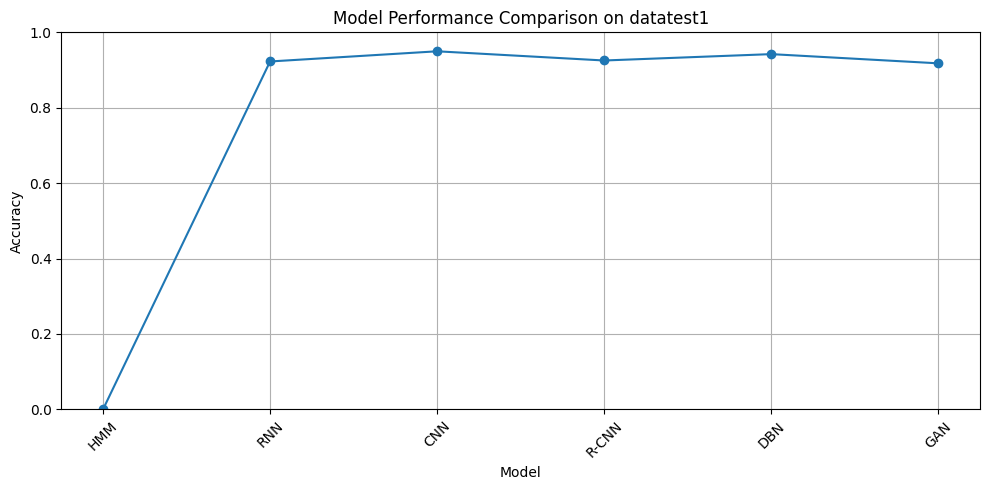

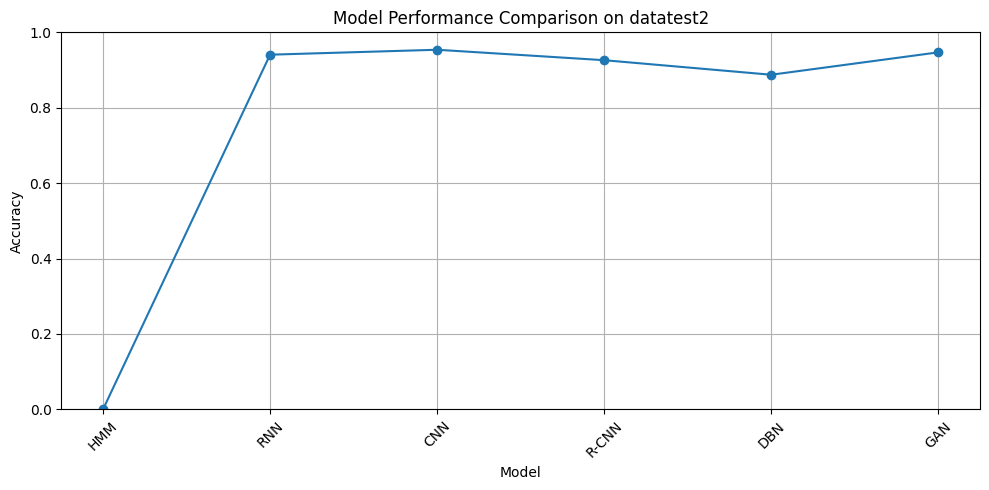

In [ ]:
import matplotlib.pyplot as plt

# Define model names and their corresponding accuracies for datatest1 and datatest2
model_names = ["HMM", "RNN", "CNN", "R-CNN", "DBN", "GAN"]
accuracy_datatest1 = [0 , 0.9227, 0.9497, 0.9253, 0.9422, 0.9178]
accuracy_datatest2 = [0 , 0.9407, 0.9538, 0.9261, 0.8875, 0.9469]

# Plotting for datatest1
plt.figure(figsize=(10, 5))
plt.plot(model_names, accuracy_datatest1, marker='o')
plt.title('Model Performance Comparison on datatest1')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits to be between 0 and 1 for accuracy
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting for datatest2
plt.figure(figsize=(10, 5))
plt.plot(model_names, accuracy_datatest2, marker='o')
plt.title('Model Performance Comparison on datatest2')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits to be between 0 and 1 for accuracy
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Diagnosis Line Graph

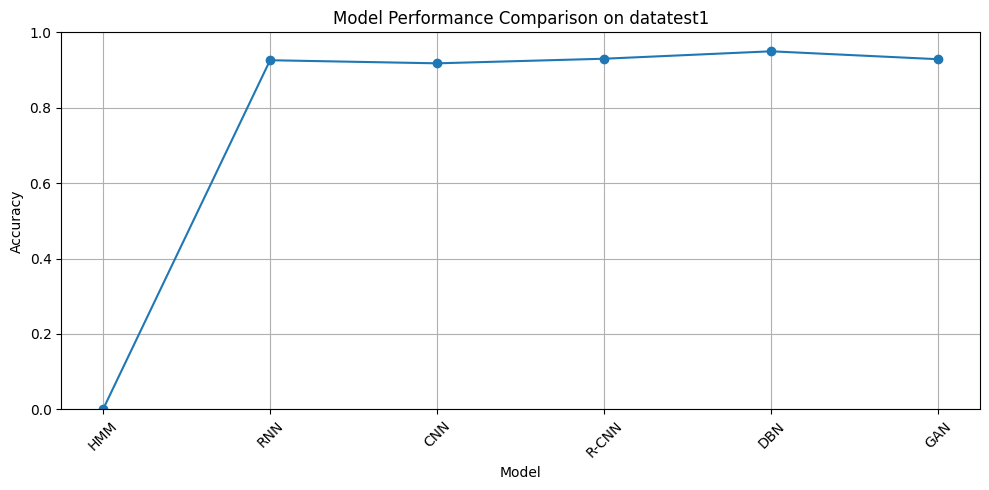

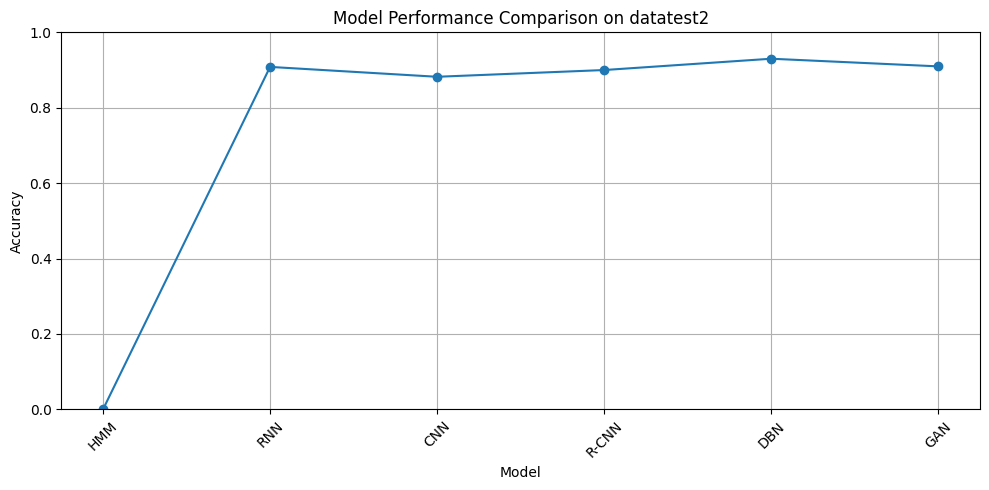

In [ ]:
import matplotlib.pyplot as plt

# Define model names and their corresponding accuracies for datatest1 and datatest2
model_names = ["HMM", "RNN", "CNN", "R-CNN", "DBN", "GAN"]
accuracy_datatest1 = [0 , 0.9260, 0.9178, 0.93, 0.9497, 0.9287]
accuracy_datatest2 = [0 , 0.9083, 0.8821, 0.90, 0.9300, 0.9097]

# Plotting for datatest1
plt.figure(figsize=(10, 5))
plt.plot(model_names, accuracy_datatest1, marker='o')
plt.title('Model Performance Comparison on datatest1')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits to be between 0 and 1 for accuracy
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting for datatest2
plt.figure(figsize=(10, 5))
plt.plot(model_names, accuracy_datatest2, marker='o')
plt.title('Model Performance Comparison on datatest2')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits to be between 0 and 1 for accuracy
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
